In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import signal
import scipy.optimize 

#Some plot parameters
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18

In [296]:
#Read in data file

fprawdata_df = pd.read_csv('FED3_Trial_SP 7-6 _FP2021-10-22T11_07_15.csv',
                           sep=',',index_col=False) #change file for each mouse! brings data in to the journal

#Read in the keys file for time stamps
fprawdatakey_df = pd.read_csv('FED3_Trial_SP 7-6 _Pellet RetrivalTimestamp 2021-10-22T11_07_14.csv',
                            sep=',',index_col=False, names = ['Timestamp', 'Value.Seconds','Value.Value'])

In [297]:
fprawdata_df

,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
0,0,932.048544,0,0,0,0,0,0,0.003922,0.003922,0.003922,0.003922
1,1,932.073504,2,0,0,0,0,0,0.019885,0.022295,0.019091,0.028573
2,2,932.098528,1,0,0,0,0,0,0.019490,0.018940,0.017336,0.018963
3,3,932.123520,4,0,0,0,0,0,0.916484,0.667034,0.077661,0.112602
4,4,932.148512,2,0,0,0,0,0,0.019917,0.022213,0.019036,0.028561
...,...,...,...,...,...,...,...,...,...,...,...,...
304718,304718,8549.931552,1,0,0,0,0,0,0.010152,0.010263,0.013739,0.015140
304719,304719,8549.956544,4,0,0,0,0,0,0.885384,0.648579,0.078204,0.117100
304720,304720,8549.981536,2,0,0,0,0,0,0.015179,0.017779,0.016930,0.027411
304721,304721,8550.006496,1,0,0,0,0,0,0.010113,0.010174,0.013683,0.015035


In [298]:
fprawdatakey_df

,Timestamp,Value.Seconds,Value.Value
0,Timestamp,Value.Seconds,Value.Value
1,4103.197984,4103.243296,TRUE
2,4103.397984,4103.443264,FALSE
3,4173.322336,4173.363296,TRUE
4,4173.522336,4173.563264,FALSE
5,4248.9216,4248.957248,TRUE
6,4249.1216,4249.157248,FALSE
7,4313.545984,4313.578496,TRUE
8,4313.745984,4313.778464,FALSE
9,4377.8704,4377.899136,TRUE


# Manual Deinterleaving

In [299]:
# some quick numbers on the appropriate number of data points to grab around those time points
# 1 minute = 1200 frames
# 5 minutes = 6000 frames
# 10 minutes = 12000 frames
# 15 minutes = 18000 frames
# 20 minutes = 24000 frames
# 25 minutes = 30000 frames
# 30 minutes = 36000 frames

In [300]:
fprawdata410_df = fprawdata_df.iloc[20405::3,:]
fprawdata470_df = fprawdata_df.iloc[20404::3,:]
fprawdata560_df = fprawdata_df.iloc[20406::3,:]
fprawdata410_df.reset_index(inplace=True) #Will reset the index with new row numbers
fprawdata470_df.reset_index(inplace=True)
fprawdata560_df.reset_index(inplace=True)

In [301]:
fprawdata410_df

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
0,20405,20405,1442.170304,1,0,0,0,0,0,0.013458,0.012784,0.014816,0.016286
1,20408,20408,1442.245312,1,0,0,0,0,0,0.013437,0.012776,0.014823,0.016314
2,20411,20411,1442.320320,1,0,0,0,0,0,0.013463,0.012816,0.014802,0.016279
3,20414,20414,1442.395328,1,0,0,0,0,0,0.013470,0.012748,0.014846,0.016282
4,20417,20417,1442.470304,1,0,0,0,0,0,0.013476,0.012763,0.014806,0.016281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94768,304709,304709,8549.706528,1,0,0,0,0,0,0.010137,0.010264,0.013698,0.015079
94769,304712,304712,8549.781536,1,0,0,0,0,0,0.010152,0.010231,0.013689,0.015062
94770,304715,304715,8549.856544,1,0,0,0,0,0,0.010108,0.010181,0.013696,0.015065
94771,304718,304718,8549.931552,1,0,0,0,0,0,0.010152,0.010263,0.013739,0.015140


In [302]:
fprawdata470_df

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
0,20404,20404,1442.145312,2,0,0,0,0,0,0.017127,0.018861,0.016970,0.026520
1,20407,20407,1442.220320,2,0,0,0,0,0,0.017168,0.018961,0.016998,0.026603
2,20410,20410,1442.295296,2,0,0,0,0,0,0.017156,0.018900,0.016967,0.026469
3,20413,20413,1442.370304,2,0,0,0,0,0,0.017208,0.018935,0.017019,0.026529
4,20416,20416,1442.445312,2,0,0,0,0,0,0.017187,0.018900,0.017049,0.026511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94768,304708,304708,8549.681536,2,0,0,0,0,0,0.015169,0.017622,0.017012,0.027434
94769,304711,304711,8549.756544,2,0,0,0,0,0,0.015146,0.017606,0.016979,0.027422
94770,304714,304714,8549.831552,2,0,0,0,0,0,0.015171,0.017685,0.017001,0.027415
94771,304717,304717,8549.906528,2,0,0,0,0,0,0.015170,0.017654,0.016994,0.027453


In [303]:
fprawdata560_df

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
0,20406,20406,1442.195328,4,0,0,0,0,0,0.897379,0.653626,0.075159,0.108729
1,20409,20409,1442.270304,4,0,0,0,0,0,0.897320,0.653690,0.075084,0.108746
2,20412,20412,1442.345312,4,0,0,0,0,0,0.897159,0.653532,0.075385,0.108733
3,20415,20415,1442.420320,4,0,0,0,0,0,0.897154,0.653647,0.075638,0.108737
4,20418,20418,1442.495328,4,0,0,0,0,0,0.897420,0.653534,0.076033,0.108748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94768,304710,304710,8549.731520,4,0,0,0,0,0,0.885123,0.648674,0.078312,0.117169
94769,304713,304713,8549.806528,4,0,0,0,0,0,0.885222,0.648696,0.078280,0.117173
94770,304716,304716,8549.881536,4,0,0,0,0,0,0.885159,0.648673,0.078210,0.117200
94771,304719,304719,8549.956544,4,0,0,0,0,0,0.885384,0.648579,0.078204,0.117100


# Plot Raw Data

In [304]:
gcamp_raw_signalright = fprawdata470_df['Region0G']
gcamp_raw_referenceright = fprawdata410_df['Region0G']

rcamp_raw_signalright = fprawdata560_df['Region2R']
rcamp_raw_referenceright = fprawdata410_df['Region2R']

gcamp_raw_signalleft = fprawdata470_df['Region1G']
gcamp_raw_referenceleft = fprawdata410_df['Region1G']

rcamp_raw_signalleft = fprawdata560_df['Region3R']
rcamp_raw_referenceleft = fprawdata410_df['Region3R']

x = fprawdata410_df['Timestamp']


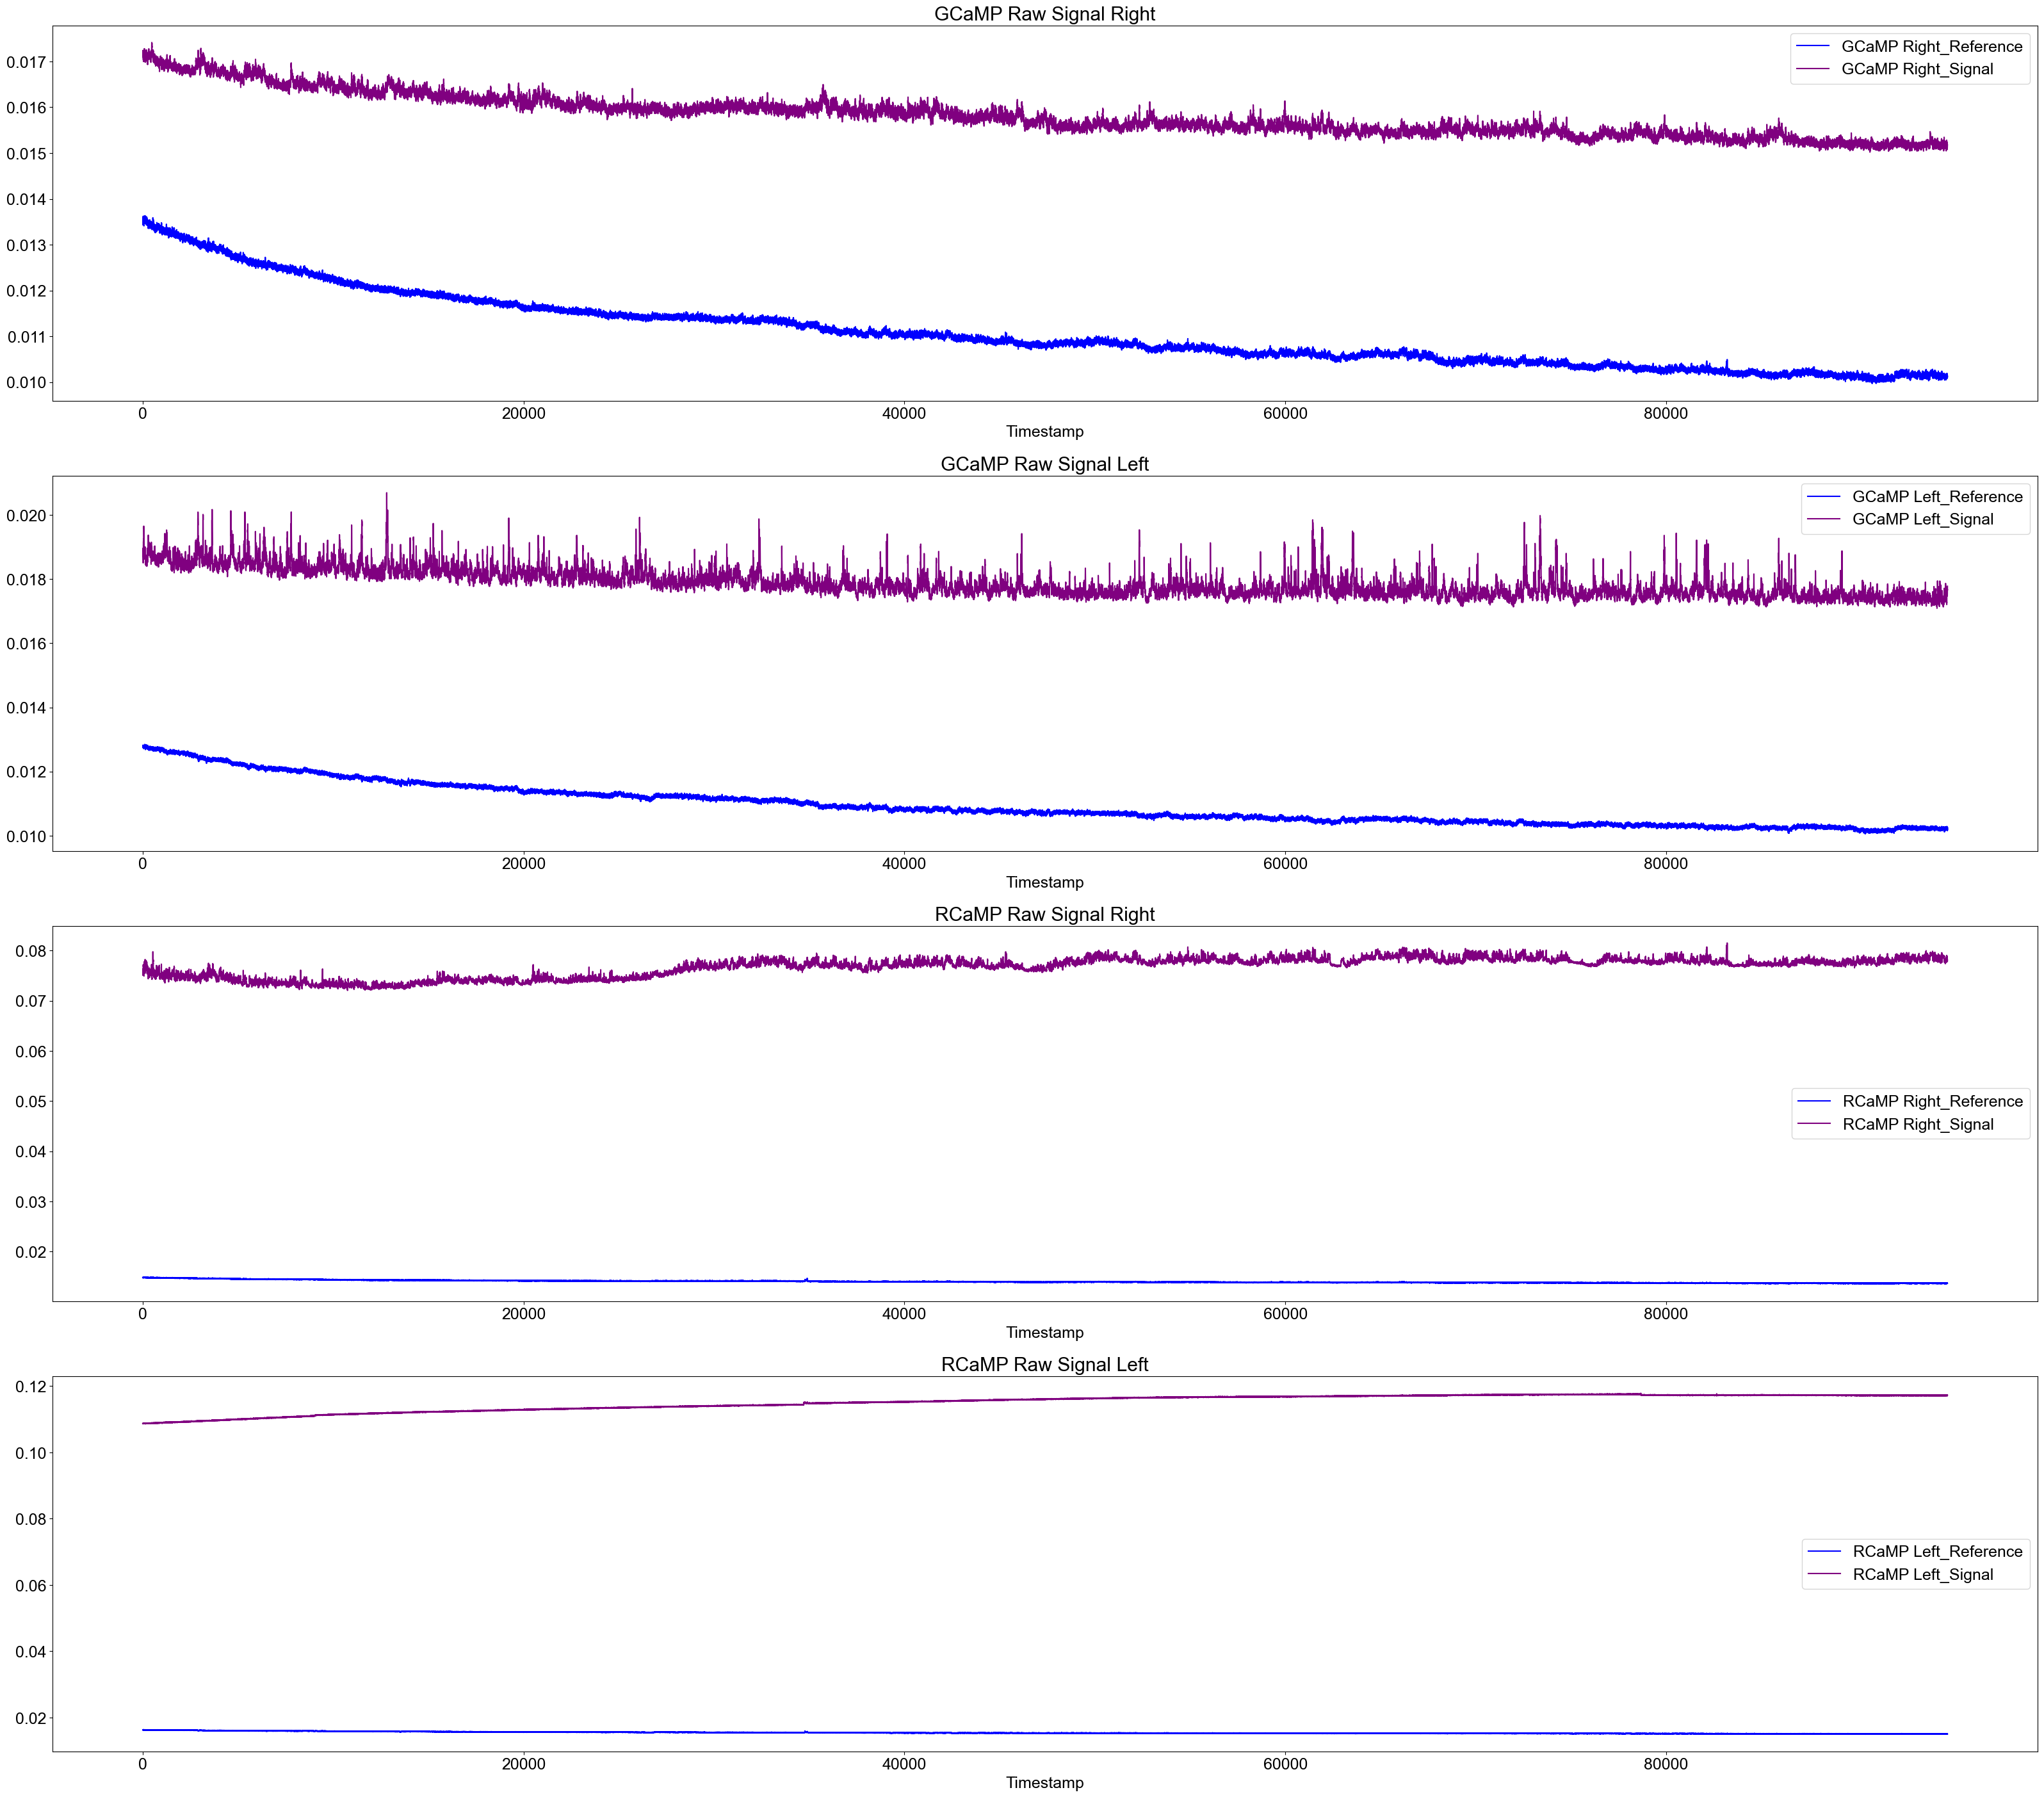

In [305]:
fig = plt.figure(figsize=(40, 35))
ax1 = fig.add_subplot(411,label='Right')
ax1.plot(gcamp_raw_referenceright,'blue',linewidth=1.5,label='GCaMP Right_Reference')
ax1.plot(gcamp_raw_signalright,'purple',linewidth=1.5,label='GCaMP Right_Signal')
ax1.set_xlabel('Timestamp')
plt.title('GCaMP Raw Signal Right')
plt.legend()

ax2 = fig.add_subplot(412,label='Left')
ax2.plot(gcamp_raw_referenceleft,'blue',linewidth=1.5,label='GCaMP Left_Reference')
ax2.plot(gcamp_raw_signalleft,'purple',linewidth=1.5,label='GCaMP Left_Signal')
ax2.set_xlabel('Timestamp')
plt.title('GCaMP Raw Signal Left')
plt.legend()

ax3 = fig.add_subplot(413,label='Right')
ax3.plot(rcamp_raw_referenceright,'blue',linewidth=1.5,label='RCaMP Right_Reference')
ax3.plot(rcamp_raw_signalright,'purple',linewidth=1.5,label='RCaMP Right_Signal')
ax3.set_xlabel('Timestamp')
plt.title('RCaMP Raw Signal Right')
plt.legend()

ax4 = fig.add_subplot(414,label='Left')
ax4.plot(rcamp_raw_referenceleft,'blue',linewidth=1.5,label='RCaMP Left_Reference')
ax4.plot(rcamp_raw_signalleft,'purple',linewidth=1.5,label='RCaMP Left_Signal')
ax4.set_xlabel('Timestamp')
plt.title('RCaMP Raw Signal Left')
plt.legend()

# Smooth the Signal

In [306]:
def smooth_signal(x,window_len=10,window='flat'):

    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    The code taken from: https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
                'flat' window will produce a moving average smoothing.

    output:
        the smoothed signal        
    """

    import numpy as np

    if x.ndim != 1:
        raise(ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise(ValueError, "Window is one of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]

    if window == 'flat': # Moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')

    return y[(int(window_len/2)-1):-int(window_len/2)]

In [307]:
#Smooth Signal 
smooth_win = 20
gcamp_smooth_signalright = smooth_signal(gcamp_raw_signalright, smooth_win)
rcamp_smooth_signalright = smooth_signal(rcamp_raw_signalright, smooth_win)
gcamp_smooth_referenceright = smooth_signal(gcamp_raw_referenceright, smooth_win)
rcamp_smooth_referenceright = smooth_signal(rcamp_raw_referenceright, smooth_win)
gcamp_smooth_signalleft = smooth_signal(gcamp_raw_signalleft, smooth_win)
rcamp_smooth_signalleft = smooth_signal(rcamp_raw_signalleft, smooth_win)
gcamp_smooth_referenceleft = smooth_signal(gcamp_raw_referenceleft, smooth_win)
rcamp_smooth_referenceleft = smooth_signal(rcamp_raw_referenceleft, smooth_win)

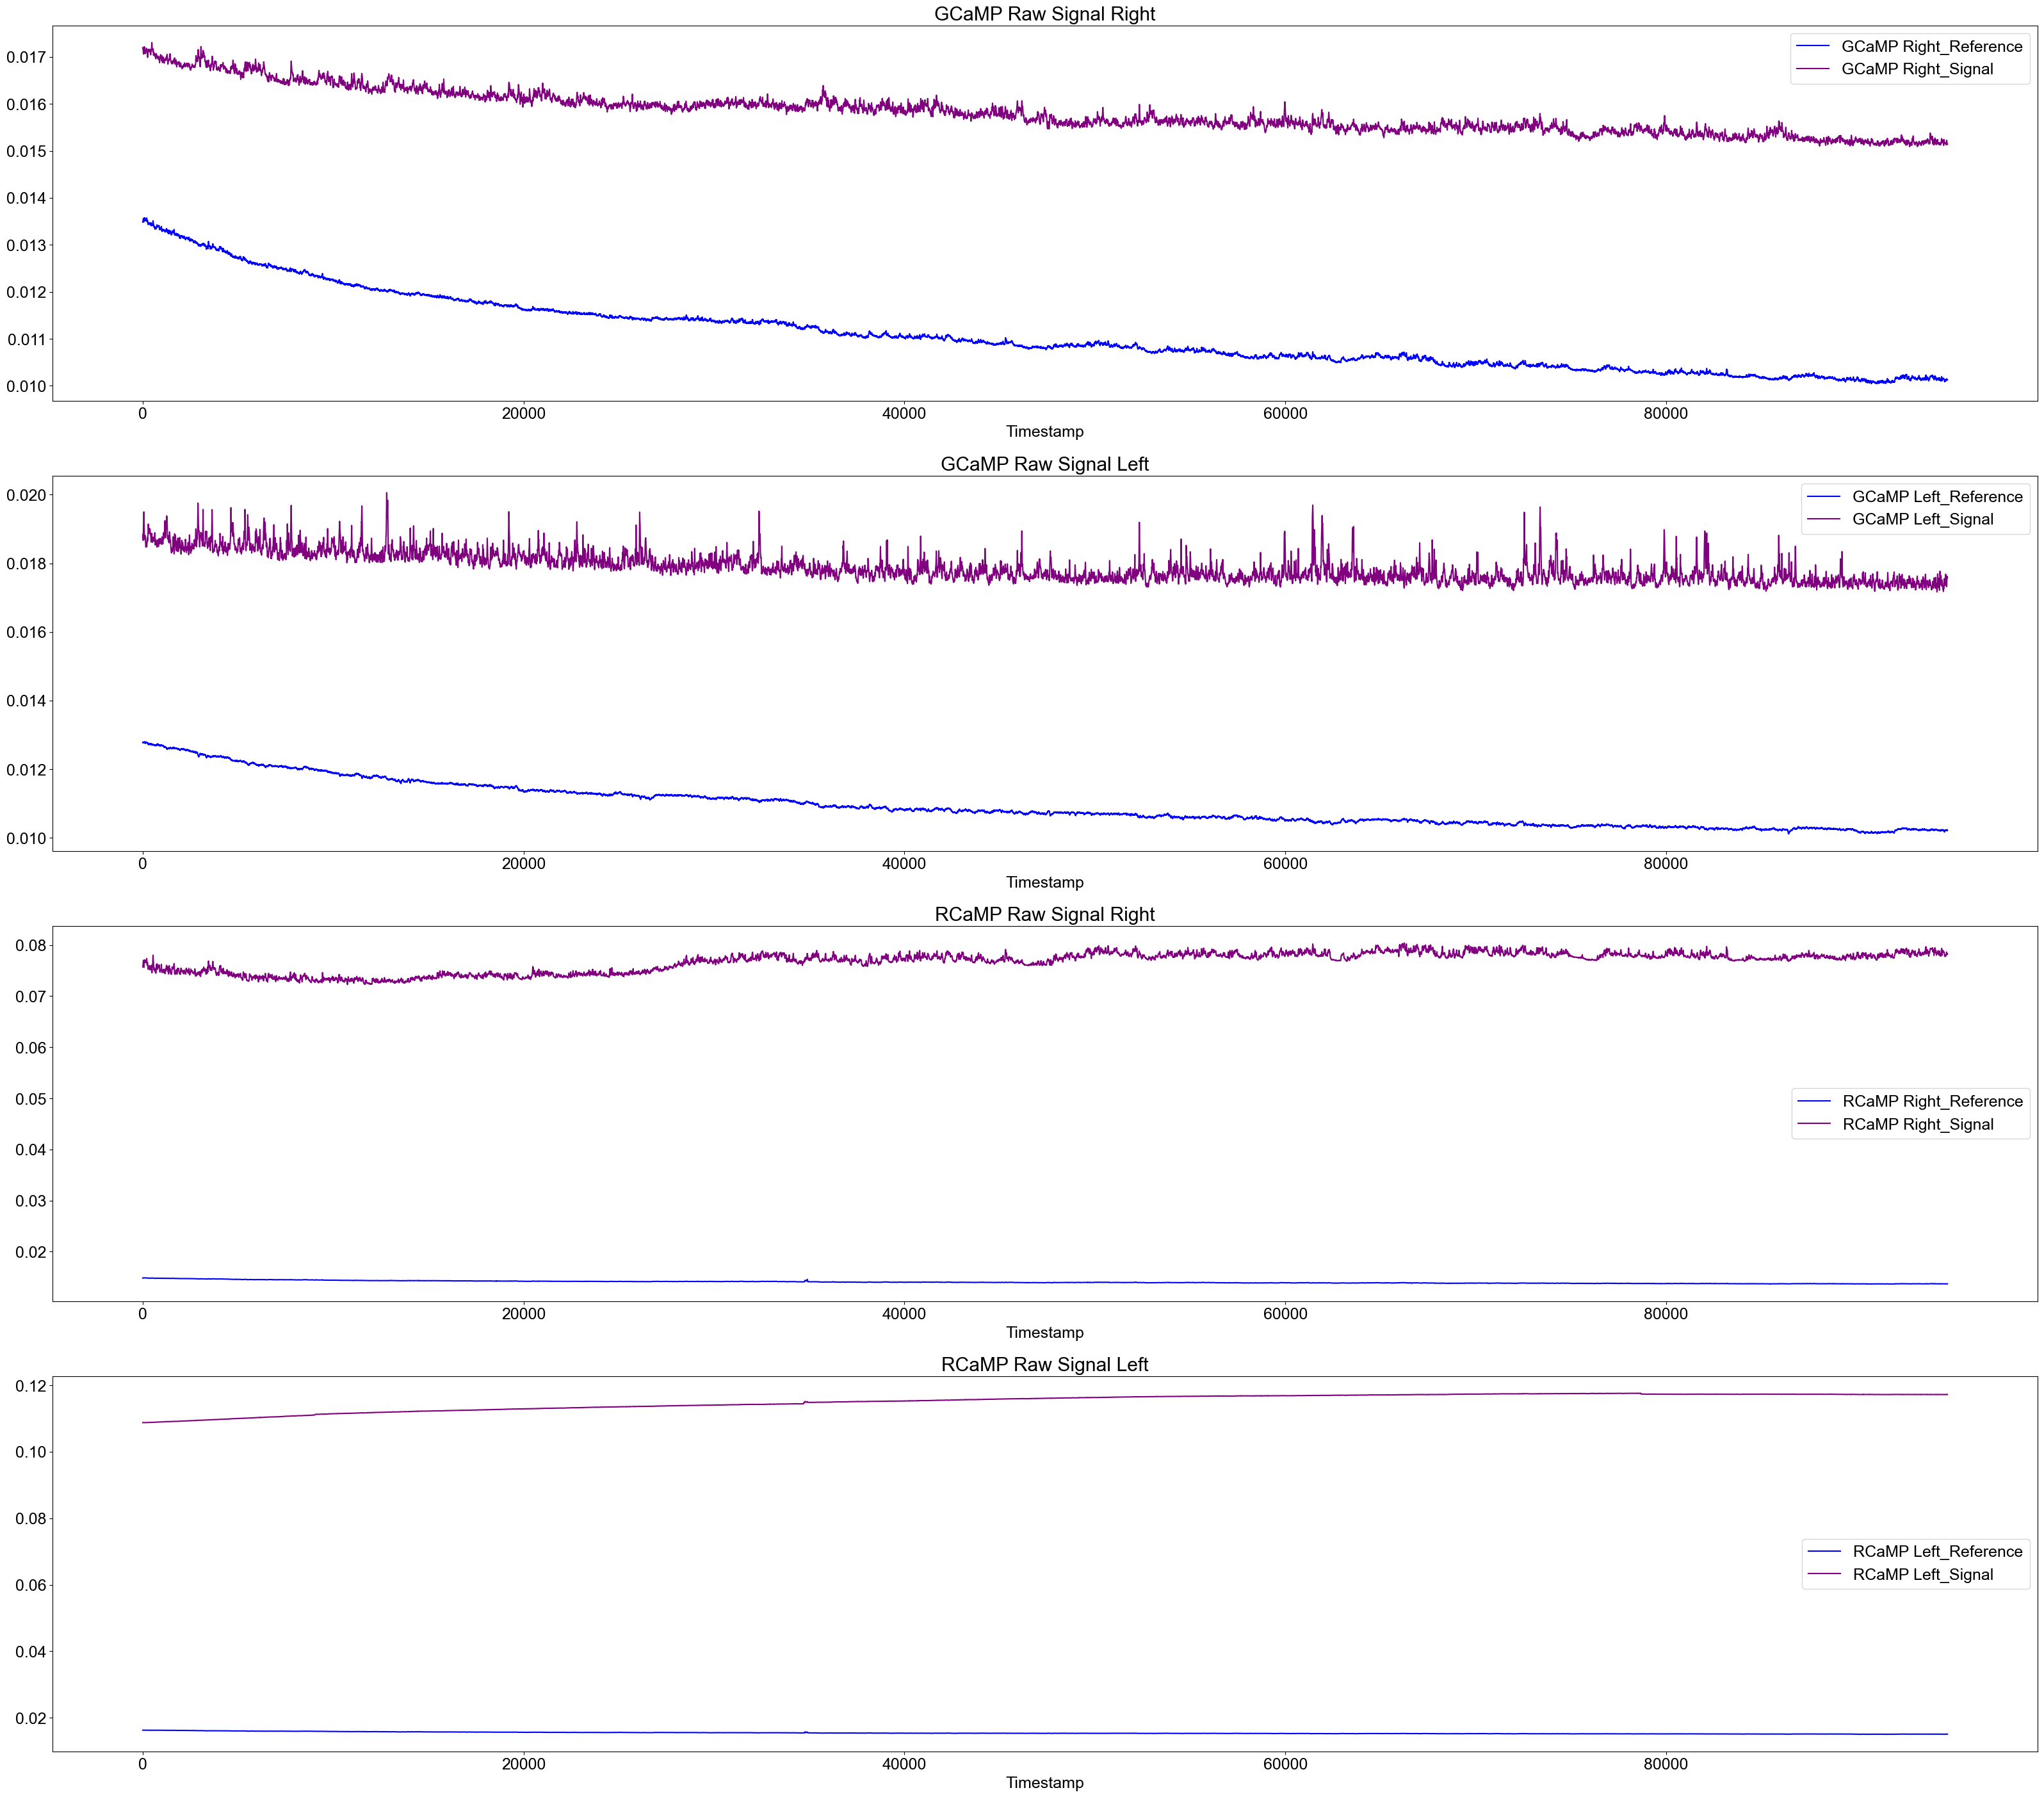

In [308]:
fig = plt.figure(figsize=(40, 35))
ax1 = fig.add_subplot(411,label='Right')
ax1.plot(gcamp_smooth_referenceright,'blue',linewidth=1.5,label='GCaMP Right_Reference')
ax1.plot(gcamp_smooth_signalright,'purple',linewidth=1.5,label='GCaMP Right_Signal')
ax1.set_xlabel('Timestamp')
plt.title('GCaMP Raw Signal Right')
plt.legend()

ax2 = fig.add_subplot(412,label='Left')
ax2.plot(gcamp_smooth_referenceleft,'blue',linewidth=1.5,label='GCaMP Left_Reference')
ax2.plot(gcamp_smooth_signalleft,'purple',linewidth=1.5,label='GCaMP Left_Signal')
ax2.set_xlabel('Timestamp')
plt.title('GCaMP Raw Signal Left')
plt.legend()

ax3 = fig.add_subplot(413,label='Right')
ax3.plot(rcamp_smooth_referenceright,'blue',linewidth=1.5,label='RCaMP Right_Reference')
ax3.plot(rcamp_smooth_signalright,'purple',linewidth=1.5,label='RCaMP Right_Signal')
ax3.set_xlabel('Timestamp')
plt.title('RCaMP Raw Signal Right')
plt.legend()

ax4 = fig.add_subplot(414,label='Left')
ax4.plot(rcamp_smooth_referenceleft,'blue',linewidth=1.5,label='RCaMP Left_Reference')
ax4.plot(rcamp_smooth_signalleft,'purple',linewidth=1.5,label='RCaMP Left_Signal')
ax4.set_xlabel('Timestamp')
plt.title('RCaMP Raw Signal Left')
plt.legend()

# Divide 470 & 560 by 415 to correct signals

In [309]:
gcamp_corrected_signalright = gcamp_smooth_signalright/gcamp_smooth_referenceright
gcamp_corrected_signalleft = gcamp_smooth_signalleft/gcamp_smooth_referenceleft

gcamp_corrected_signalright_df = pd.Series(gcamp_corrected_signalright) #will read the trace into an editable dataframe
gcamp_corrected_signalleft_df = pd.Series(gcamp_corrected_signalleft) #will read the trace into an editable dataframe

rcamp_corrected_signalright = rcamp_smooth_signalright/rcamp_smooth_referenceright
rcamp_corrected_signalleft = rcamp_smooth_signalleft/rcamp_smooth_referenceleft

rcamp_corrected_signalright_df = pd.Series(rcamp_corrected_signalright) #will read the trace into an editable dataframe
rcamp_corrected_signalleft_df = pd.Series(rcamp_corrected_signalleft) #will read the trace into an editable dataframe

# Find Timestamp

In [310]:
fprawdatakey_df

,Timestamp,Value.Seconds,Value.Value
0,Timestamp,Value.Seconds,Value.Value
1,4103.197984,4103.243296,TRUE
2,4103.397984,4103.443264,FALSE
3,4173.322336,4173.363296,TRUE
4,4173.522336,4173.563264,FALSE
5,4248.9216,4248.957248,TRUE
6,4249.1216,4249.157248,FALSE
7,4313.545984,4313.578496,TRUE
8,4313.745984,4313.778464,FALSE
9,4377.8704,4377.899136,TRUE


In [311]:
pellet1 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[1]))).argmin()
print(pellet1)
#Take caution because below I show that fprawdata560 recieves input before ^410 so this means that input will not consistently
#happen on the same ledstate

35481


In [312]:
fprawdata470_df[35475:35500]

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
35475,126829,126829,4102.747968,2,0,0,0,0,0,0.016006,0.018097,0.017046,0.027117
35476,126832,126832,4102.822976,2,0,0,0,0,0,0.016019,0.018078,0.017102,0.027132
35477,126835,126835,4102.897984,2,0,0,0,0,0,0.016059,0.018043,0.017049,0.027118
35478,126838,126838,4102.972992,2,0,0,0,0,0,0.016079,0.018031,0.017126,0.027113
35479,126841,126841,4103.047968,2,0,0,0,0,0,0.016104,0.018078,0.017092,0.027147
35480,126844,126844,4103.122976,2,0,0,0,0,0,0.016105,0.018095,0.017110,0.027119
35481,126847,126847,4103.197984,2,0,0,0,0,0,0.016051,0.017974,0.017136,0.027184
35482,126850,126850,4103.272992,2,0,0,0,1,0,0.016062,0.017953,0.017077,0.027112
35483,126853,126853,4103.347968,2,0,0,0,1,0,0.016064,0.017969,0.017095,0.027129
35484,126856,126856,4103.422976,2,0,0,0,1,0,0.015990,0.017922,0.017093,0.027190


In [313]:
fprawdata410_df[35475:35500]

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
35475,126830,126830,4102.772960,1,0,0,0,0,0,0.011205,0.010980,0.014064,0.015465
35476,126833,126833,4102.847968,1,0,0,0,0,0,0.011252,0.010948,0.014074,0.015436
35477,126836,126836,4102.922976,1,0,0,0,0,0,0.011198,0.010894,0.014079,0.015447
35478,126839,126839,4102.997984,1,0,0,0,0,0,0.011279,0.010989,0.014111,0.015477
35479,126842,126842,4103.072960,1,0,0,0,0,0,0.011215,0.010968,0.014081,0.015434
35480,126845,126845,4103.147968,1,0,0,0,0,0,0.011302,0.010907,0.014007,0.015401
35481,126848,126848,4103.222976,1,0,0,0,0,0,0.011242,0.010983,0.014123,0.015431
35482,126851,126851,4103.297984,1,0,0,0,1,0,0.011268,0.010983,0.014060,0.015361
35483,126854,126854,4103.372960,1,0,0,0,1,0,0.011225,0.011011,0.014073,0.015430
35484,126857,126857,4103.447968,1,0,0,0,0,0,0.011222,0.010943,0.014049,0.015442


In [314]:
fprawdata560_df[35475:35500]

,index,FrameCounter,Timestamp,LedState,Stimulation,Output0,Output1,Input0,Input1,Region0G,Region1G,Region2R,Region3R
35475,126831,126831,4102.797984,4,0,0,0,0,0,0.890473,0.651099,0.078111,0.114847
35476,126834,126834,4102.872992,4,0,0,0,0,0,0.890401,0.651302,0.078216,0.114876
35477,126837,126837,4102.947968,4,0,0,0,0,0,0.890543,0.651266,0.078292,0.114939
35478,126840,126840,4103.022976,4,0,0,0,0,0,0.890262,0.651241,0.078329,0.114854
35479,126843,126843,4103.097984,4,0,0,0,0,0,0.890304,0.651356,0.078385,0.114863
35480,126846,126846,4103.172992,4,0,0,0,0,0,0.890346,0.651298,0.078553,0.114838
35481,126849,126849,4103.247968,4,0,0,0,1,0,0.890407,0.651343,0.078431,0.114903
35482,126852,126852,4103.322976,4,0,0,0,1,0,0.890298,0.651365,0.078568,0.114850
35483,126855,126855,4103.397984,4,0,0,0,1,0,0.890616,0.651235,0.078701,0.114835
35484,126858,126858,4103.472992,4,0,0,0,0,0,0.890408,0.651207,0.078581,0.114867


In [315]:
pellet1 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[1]))).argmin()
print(pellet1)

35481


In [316]:
pellet2 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[3]))).argmin()
print(pellet2)


36416


In [317]:
pellet3 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[5]))).argmin()
print(pellet3)


37424


In [318]:
pellet4 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[7]))).argmin()
print(pellet4)


38285


In [319]:
pellet5 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[9]))).argmin()
print(pellet5)

39143


In [320]:
pellet6 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[11]))).argmin()
print(pellet6)

40344


In [321]:
pellet7 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[13]))).argmin()
print(pellet7)

41275


In [322]:
pellet8 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[15]))).argmin()
print(pellet8)

42500


In [323]:
pellet9 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[17]))).argmin()
print(pellet9)

43521


In [324]:
pellet10 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[19]))).argmin()
print(pellet10)

44362


In [325]:
pellet11 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[21]))).argmin()
print(pellet11)

45662


In [326]:
pellet12 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[23]))).argmin()
print(pellet12)

52597


In [327]:
pellet13 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[25]))).argmin()
print(pellet13)

53722


In [328]:
pellet14 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[27]))).argmin()
print(pellet14)

54702


In [329]:
pellet15 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[29]))).argmin()
print(pellet15)

55507


In [330]:
pellet16 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[31]))).argmin()
print(pellet16)

56829


In [331]:
pellet17 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[33]))).argmin()
print(pellet17)

57761


In [332]:
pellet18 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[35]))).argmin()
print(pellet18)

59439


In [333]:
pellet19 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[37]))).argmin()
print(pellet19)

67964


In [334]:
pellet20 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[39]))).argmin()
print(pellet20)

69158


In [335]:
pellet21 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[41]))).argmin()
print(pellet21)

70643


In [336]:
pellet22 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[43]))).argmin()
print(pellet22)

71834


In [337]:
pellet23 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[45]))).argmin()
print(pellet23)

73205


In [338]:
pellet24 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[47]))).argmin()
print(pellet24)

78149


In [339]:
pellet25 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[49]))).argmin()
print(pellet25)

79786


In [340]:
pellet26 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[51]))).argmin()
print(pellet26)

81429


In [341]:
pellet27 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[53]))).argmin()
print(pellet27)

85725


In [342]:
pellet28 = (np.abs(fprawdata410_df['Timestamp'] - float(fprawdatakey_df['Timestamp'].iloc[55]))).argmin()
print(pellet28)

86558


# Plot Corrected Data for 470/410

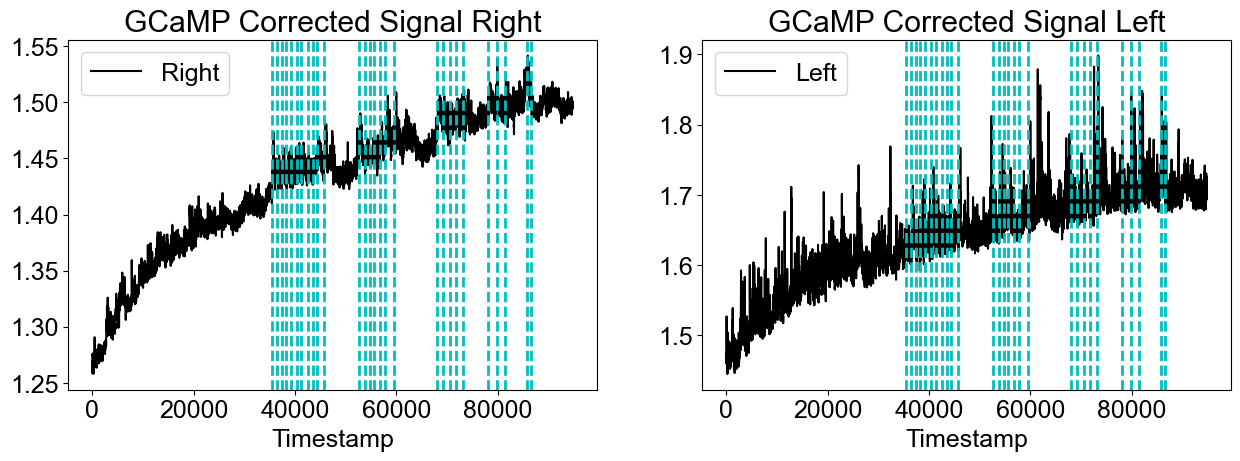

In [343]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.plot(gcamp_corrected_signalright,'black',linewidth=1.5,label='Right')
ax1.set_xlabel('Timestamp')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.title('GCaMP Corrected Signal Right')
plt.legend()

ax2 = fig.add_subplot(222)
ax2.plot(gcamp_corrected_signalleft,'black',linewidth=1.5,label='Left')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
ax2.set_xlabel('Timestamp')
plt.title('GCaMP Corrected Signal Left')
plt.legend()

# Plot Corrected Data for 560/410

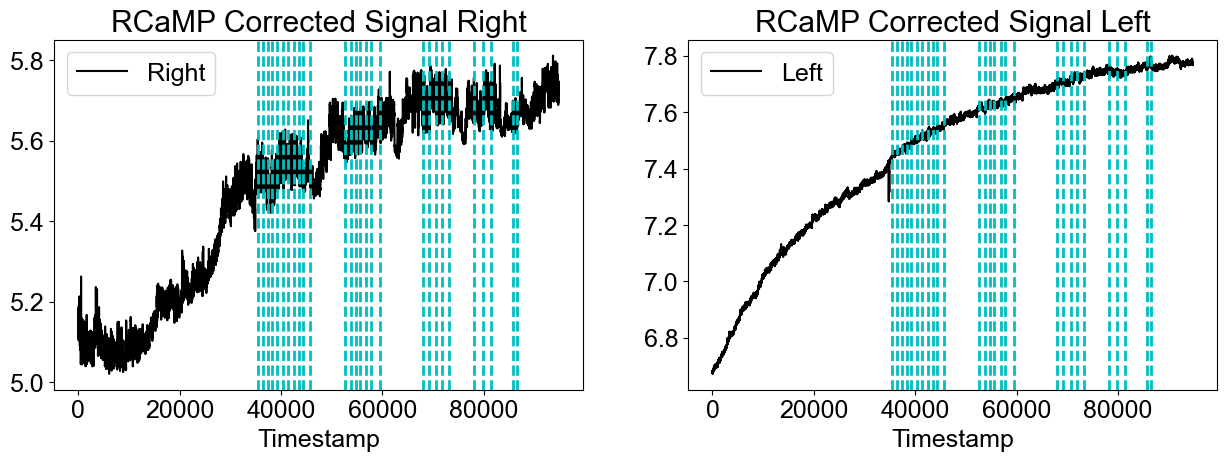

In [344]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.plot(rcamp_corrected_signalright,'black',linewidth=1.5,label='Right')
ax1.set_xlabel('Timestamp')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.title('RCaMP Corrected Signal Right')
plt.legend()

ax2 = fig.add_subplot(222)
ax2.plot(rcamp_corrected_signalleft,'black',linewidth=1.5,label='Left')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
ax2.set_xlabel('Timestamp')
plt.title('RCaMP Corrected Signal Left')
plt.legend()

# Fit Corrected signals using Biexponential Function

In [345]:
#Define x and y for curvefits
x =  fprawdata410_df['Timestamp'].values
y1 = gcamp_corrected_signalright_df.values
y2 = gcamp_corrected_signalleft_df.values
y3 = rcamp_corrected_signalright_df.values
y4 = rcamp_corrected_signalleft_df.values

In [346]:
x

array([1442.170304, 1442.245312, 1442.32032 , ..., 8549.856544,
       8549.931552, 8550.006496])

In [347]:
y1

array([1.27556362, 1.27556362, 1.27534295, ..., 1.49529969, 1.49552017,
       1.49566972])

In [348]:
y2

array([1.47469266, 1.47469266, 1.47456304, ..., 1.72218342, 1.72198814,
       1.72197926])

In [349]:
y4

array([6.67889799, 6.67889799, 6.67818853, ..., 7.76749747, 7.76801781,
       7.76687118])

[ 2.42174810e-01 -1.38588589e+04  1.50226649e+00 -2.47104464e+02]


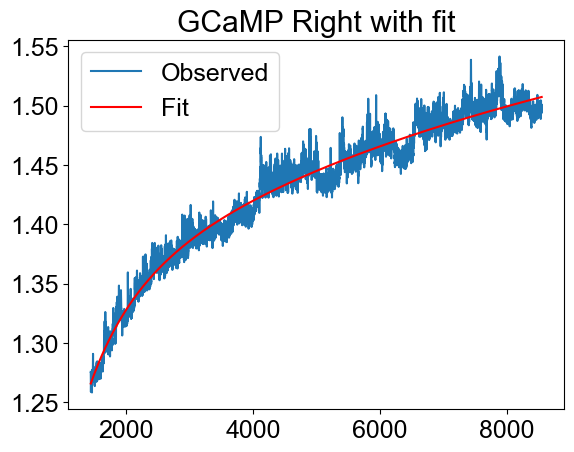

In [350]:
#for glp_corrected_signalright
def func(x, a, b, c, d):
    return a * np.exp(b / x) + c * np.exp(d / x)

#Define starting values for curve fit parameters

p0 = [2.42174821e-01, -1.38588594e+04,  1.50226649e+00, -2.47104465e+02] #You are defining the initial guess values for the fit. This actually very important and 
#will need to be tweaked for each fit.

poptgcamp_right, pcov = scipy.optimize.curve_fit(func,x,y1,p0, maxfev=7500) 

#popt = optimal curve 
#pcov = The estimated covariance of popt
#cha
print(poptgcamp_right)
plt.plot(x,y1,label = 'Observed')
plt.plot(x,func(x,*poptgcamp_right),'red', label='Fit')
plt.title('GCaMP Right with fit')
plt.legend()

Text(0.5, 1.0, 'GCaMP Right Residual Error')

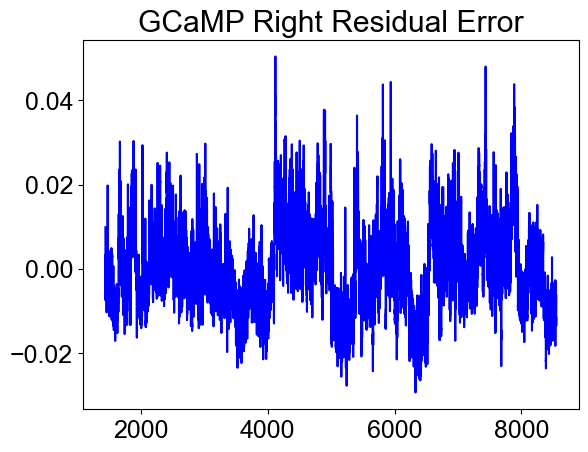

In [351]:
residualerror_gcampright = y1 - func(x, *poptgcamp_right)
plt.plot(x, residualerror_gcampright,'blue')
plt.title('GCaMP Right Residual Error')

[ 2.45462393e-01 -1.22228061e+04  1.70376896e+00 -2.14604392e+02]


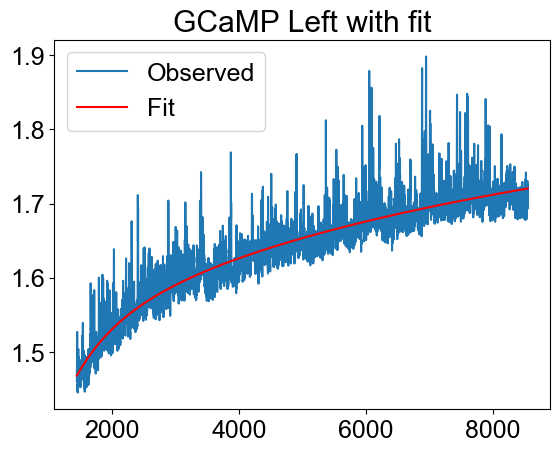

In [352]:
#for glp_corrected_signalleft
def func(x, a, b, c, d):
    return a * np.exp(b / x) + c * np.exp(d / x)

#Define starting values for curve fit parameters

p0 = [2.45457828e-01, -1.22225553e+04 , 1.70376797e+00, -2.14603333e+02] #You are defining the initial guess values for the fit. This actually very important and 
#will need to be tweaked for each fit.

poptgcamp_left, pcov = scipy.optimize.curve_fit(func,x,y2,p0, maxfev=5000) 

#popt = optimal curve 
#pcov = The estimated covariance of popt
#cha
print(poptgcamp_left)
plt.plot(x,y2,label='Observed')
plt.plot(x,func(x,*poptgcamp_left),'red', label="Fit")
plt.title('GCaMP Left with fit')
plt.legend()

Text(0.5, 1.0, 'GLP Left Residual Error')

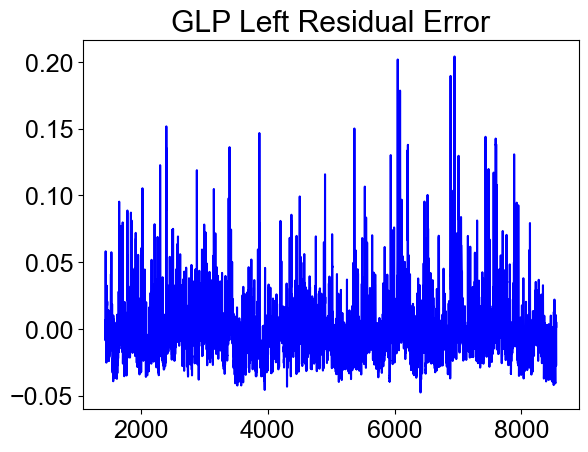

In [353]:
residualerror_gcampleft = y2 - func(x, *poptgcamp_left)
plt.plot(x, residualerror_gcampleft,'blue')
plt.title('GLP Left Residual Error')

[ 6.02598675e+00 -4.55633658e+02  1.38867093e-02  5.88334687e+03]


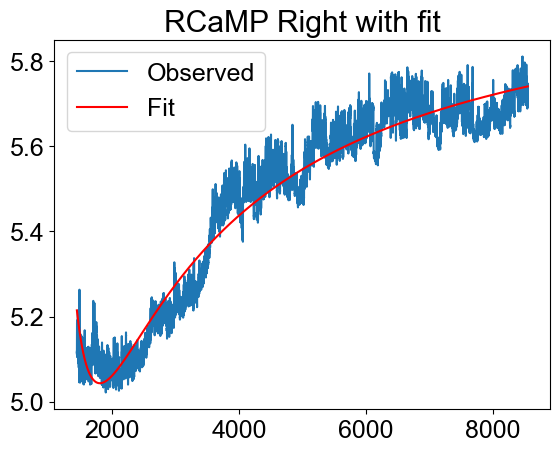

In [354]:
#for glp_corrected_signalright_red
def func(x, a, b, c, d):
    return a * np.exp(b / x) + c * np.exp(d / x)

#Define starting values for curve fit parameters

p0 = [6.02598768e+00, -4.55640002e+02,  1.38891091e-02 , 5.88312168e+03] #You are defining the initial guess values for the fit. This actually very important and 
#will need to be tweaked for each fit.

poptrcamp_right, pcov = scipy.optimize.curve_fit(func,x,y3,p0, maxfev=7000) 

#popt = optimal curve 
#pcov = The estimated covariance of popt
#cha
print(poptrcamp_right)
plt.plot(x,y3,label='Observed')
plt.plot(x,func(x,*poptrcamp_right),'red', label="Fit")
plt.title('RCaMP Right with fit')
plt.legend()

Text(0.5, 1.0, 'RCaMP Right Residual Error')

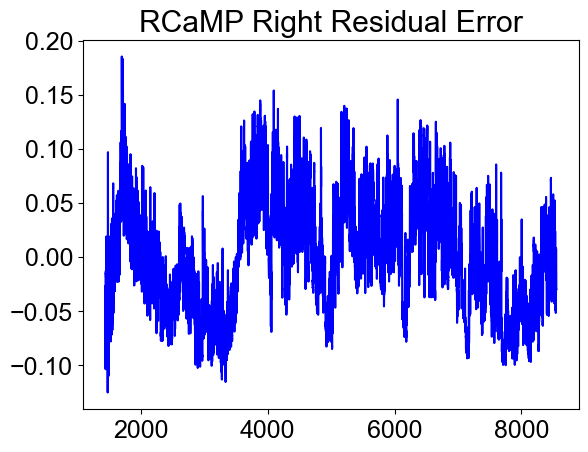

In [355]:
residualerror_rcampright = y3 - func(x, *poptrcamp_right)
plt.plot(x, residualerror_rcampright,'blue')
plt.title('RCaMP Right Residual Error')

[    2.56131741 -1660.1918494      5.65791132    53.23737475]


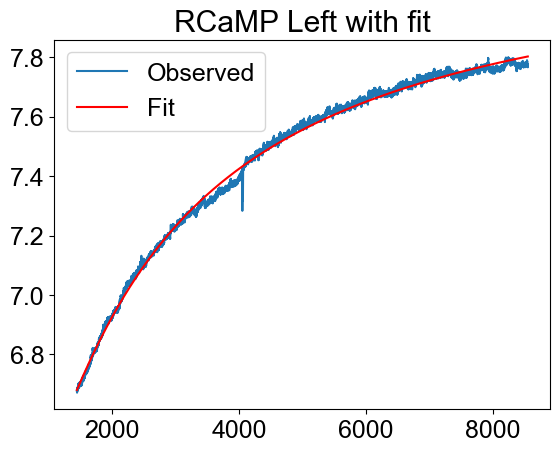

In [356]:
#for glp_corrected_signalleft_red
def func(x, a, b, c, d):
    return a * np.exp(b / x) + c * np.exp(d / x)

#Define starting values for curve fit parameters

p0 = [2.56144082, -1660.1336067, 5.65778637, 53.25176018] #You are defining the initial guess values for the fit. This actually very important and 
#will need to be tweaked for each fit.

poptrcamp_left, pcov = scipy.optimize.curve_fit(func,x,y4,p0, maxfev=5000) 

#popt = optimal curve 
#pcov = The estimated covariance of popt
#cha
print(poptrcamp_left)
plt.plot(x,y4,label='Observed')
plt.plot(x,func(x,*poptrcamp_left),'red', label="Fit")
plt.title('RCaMP Left with fit')
plt.legend()

Text(0.5, 1.0, 'RCaMP Left Residual Error')

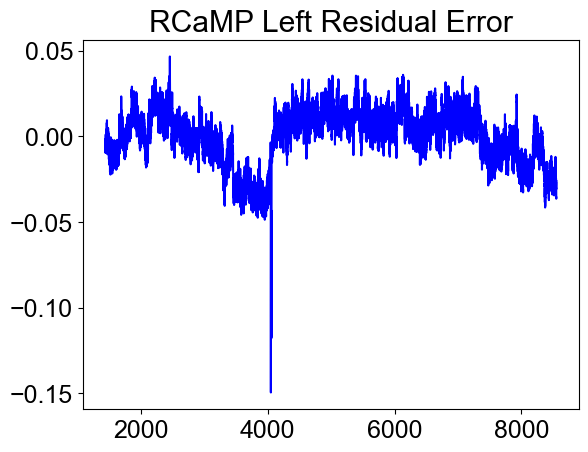

In [357]:
residualerror_rcampleft = y4 - func(x, *poptrcamp_left)
plt.plot(x, residualerror_rcampleft,'blue')
plt.title('RCaMP Left Residual Error')

# Subtract the fits from each corrected signal

In [358]:
print(poptgcamp_right.mean())
print(poptgcamp_left.mean())
print(poptrcamp_right.mean())
print(poptrcamp_left.mean())

-3526.0547400756573
-3108.8653219314065
1358.4382713367806
-399.68381148198824


In [359]:
#Definefits
gcampright_fit = func(x, *poptgcamp_right)
gcampleft_fit = func(x, *poptgcamp_left)
rcampright_fit = func(x, *poptrcamp_right)
rcampleft_fit = func(x, *poptrcamp_left)

In [360]:
#Subtractfits
gcampright_fitsub = gcamp_corrected_signalright_df/gcampright_fit
gcampleft_fitsub = gcamp_corrected_signalleft_df/gcampleft_fit

rcampright_fitsub = rcamp_corrected_signalright_df/rcampright_fit
rcampleft_fitsub = rcamp_corrected_signalleft_df/rcampleft_fit

In [361]:
print(gcampright_fitsub.mean())
print(gcampleft_fitsub.mean())
print(rcampright_fitsub.mean())
print(rcampleft_fitsub.mean())

0.9999996243392676
0.9999995197565336
0.9999972289429608
0.9999999962779472


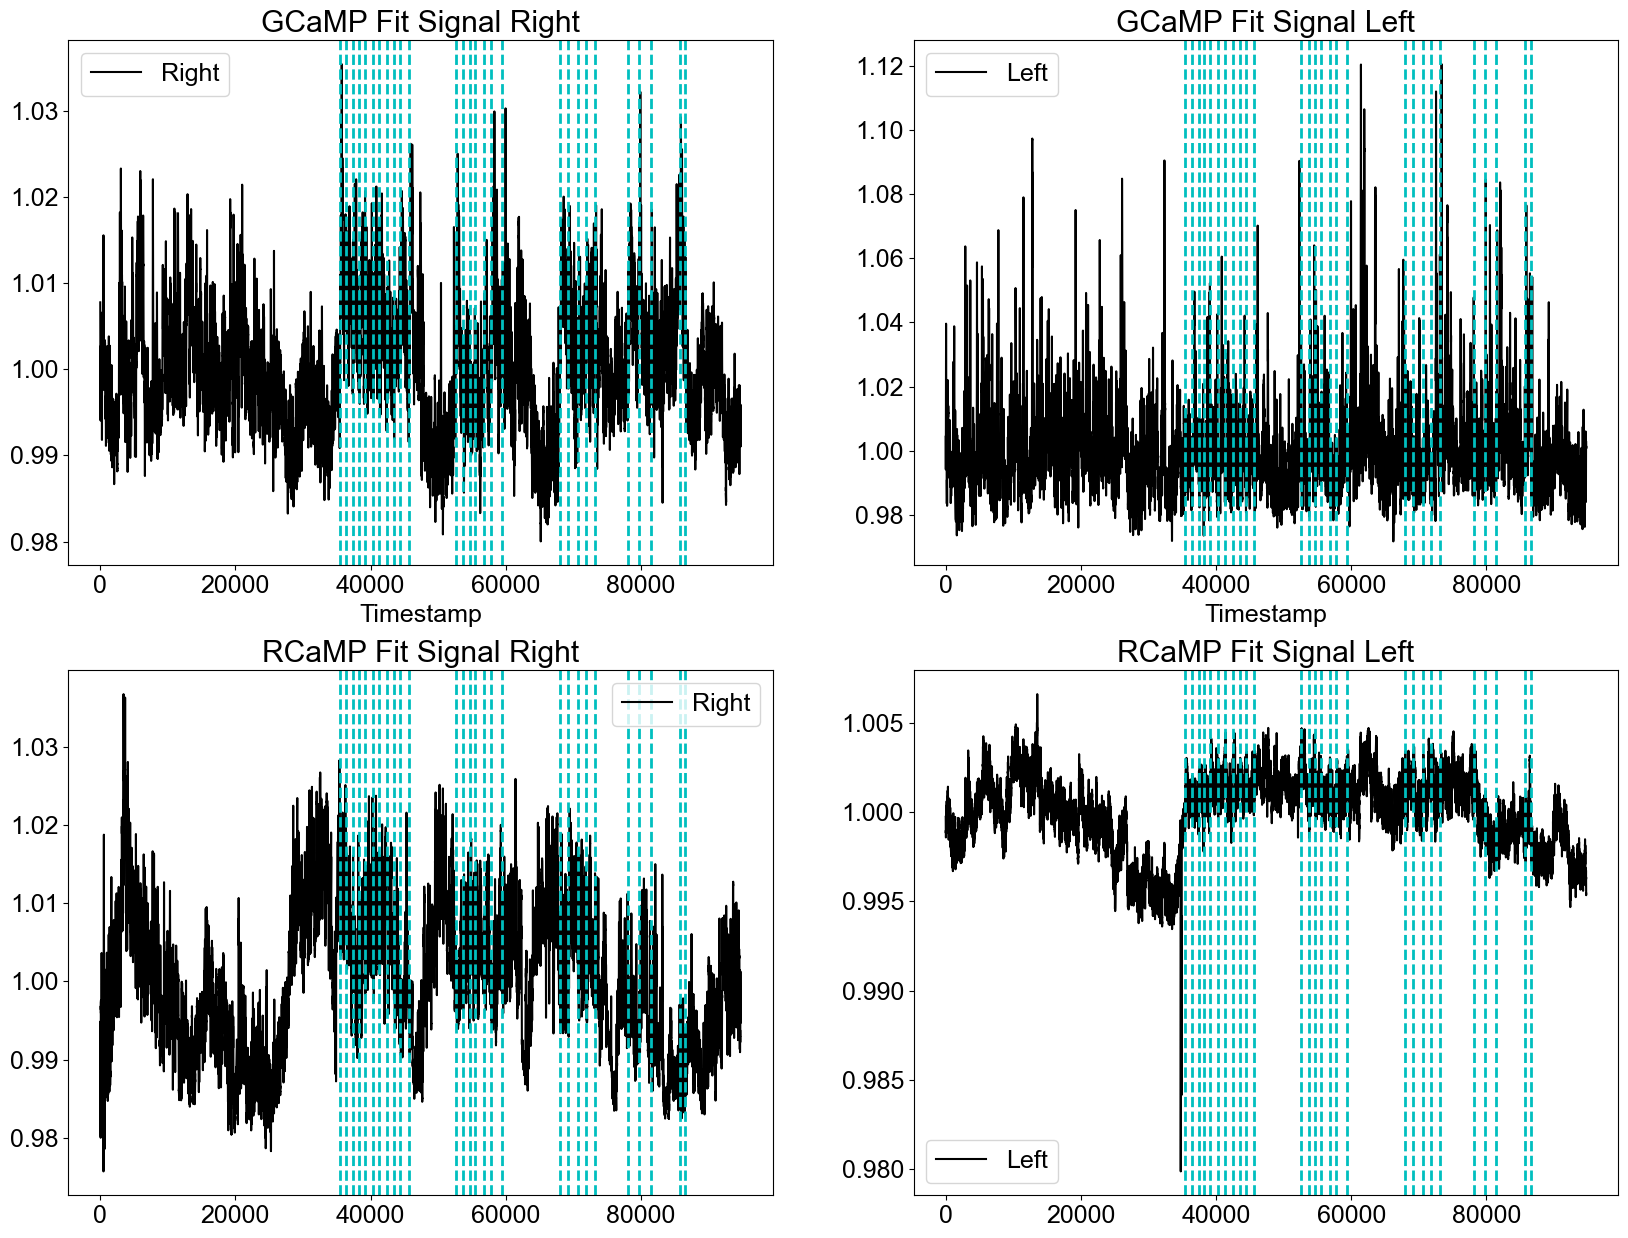

In [362]:
#Plot fit subtracted data 
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
ax1.plot(gcampright_fitsub,'black',linewidth=1.5,label='Right')
ax1.set_xlabel('Timestamp')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.title('GCaMP Fit Signal Right')
plt.legend()

ax2 = fig.add_subplot(222)
ax2.plot(gcampleft_fitsub,'black',linewidth=1.5,label='Left')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
ax2.set_xlabel('Timestamp')
plt.title('GCaMP Fit Signal Left')
plt.legend()

ax3 = fig.add_subplot(223)
ax3.plot(rcampright_fitsub,'black',linewidth=1.5,label='Right')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
ax2.set_xlabel('Timestamp')
plt.title('RCaMP Fit Signal Right')
plt.legend()

ax4 = fig.add_subplot(224)
ax4.plot(rcampleft_fitsub,'black',linewidth=1.5,label='Left')
plt.axvline(pellet1,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet2,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet3,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet4,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet5,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet6,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet7,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet8,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet9,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet10,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet11,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet12,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet13,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet14,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet15,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet16,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet17,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet18,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet19,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet20,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet21,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet22,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet23,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet24,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet25,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet26,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet27,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.axvline(pellet28,0,1,linewidth=2,color='c',linestyle='--') #Reference keydown to find spot to place line
ax2.set_xlabel('Timestamp')
plt.title('RCaMP Fit Signal Left')
plt.legend()

# Chop up data points

In [363]:
start1 = pellet1-600
stop1 = pellet1+600
start2 = pellet2-600
stop2 = pellet2+600
start3 = pellet3-600
stop3 = pellet3+600
start4 = pellet4-600
stop4 = pellet4+600
start5 = pellet5-600
stop5 = pellet5+600
start6 = pellet6-600
stop6 = pellet6+600
start7 = pellet7-600
stop7 = pellet7+600
start8 = pellet8-600
stop8 = pellet8+600
start9 = pellet9-600
stop9 = pellet9+600
start10 = pellet10-600
stop10 = pellet10+600
start11 = pellet11-600
stop11 = pellet11+600
start12 = pellet12-600
stop12 = pellet12+600
start13 = pellet13-600
stop13 = pellet13+600
start14 = pellet14-600
stop14 = pellet14+600
start15 = pellet15-600
stop15 = pellet15+600
start16 = pellet16-600
stop16 = pellet16+600
start17 = pellet17-600
stop17 = pellet17+600
start18 = pellet18-600
stop18 = pellet18+600
start19 = pellet19-600
stop19 = pellet19+600
start20 = pellet20-600
stop20 = pellet20+600
start21 = pellet21-600
stop21 = pellet21+600
start22 = pellet22-600
stop22 = pellet22+600
start23 = pellet23-600
stop23 = pellet23+600
start24 = pellet24-600
stop24 = pellet24+600
start25 = pellet25-600
stop25 = pellet25+600
start26 = pellet26-600
stop26 = pellet26+600
start27 = pellet27-600
stop27 = pellet27+600
start28 = pellet28-600
stop28 = pellet28+600

In [364]:
#Define data ranges for each signal and reset indices for all of them
#GLPright470
gcamp_signalright_epoch1 = gcampright_fitsub[start1:stop1].reset_index()
gcamp_signalright_epoch2 = gcampright_fitsub[start2:stop2].reset_index()
gcamp_signalright_epoch3 = gcampright_fitsub[start3:stop3].reset_index()
gcamp_signalright_epoch4 = gcampright_fitsub[start4:stop4].reset_index()
gcamp_signalright_epoch5 = gcampright_fitsub[start5:stop5].reset_index()
gcamp_signalright_epoch6 = gcampright_fitsub[start6:stop6].reset_index()
gcamp_signalright_epoch7 = gcampright_fitsub[start7:stop7].reset_index()
gcamp_signalright_epoch8 = gcampright_fitsub[start8:stop8].reset_index()
gcamp_signalright_epoch9 = gcampright_fitsub[start9:stop9].reset_index()
gcamp_signalright_epoch10 = gcampright_fitsub[start10:stop10].reset_index()
gcamp_signalright_epoch11 = gcampright_fitsub[start11:stop11].reset_index()
gcamp_signalright_epoch12 = gcampright_fitsub[start12:stop12].reset_index()
gcamp_signalright_epoch13 = gcampright_fitsub[start13:stop13].reset_index()
gcamp_signalright_epoch14 = gcampright_fitsub[start14:stop14].reset_index()
gcamp_signalright_epoch15 = gcampright_fitsub[start15:stop15].reset_index()
gcamp_signalright_epoch16 = gcampright_fitsub[start16:stop16].reset_index()
gcamp_signalright_epoch17 = gcampright_fitsub[start17:stop17].reset_index()
gcamp_signalright_epoch18 = gcampright_fitsub[start18:stop18].reset_index()
gcamp_signalright_epoch19 = gcampright_fitsub[start19:stop19].reset_index()
gcamp_signalright_epoch20 = gcampright_fitsub[start20:stop20].reset_index()
gcamp_signalright_epoch21 = gcampright_fitsub[start21:stop21].reset_index()
gcamp_signalright_epoch22 = gcampright_fitsub[start22:stop22].reset_index()
gcamp_signalright_epoch23 = gcampright_fitsub[start23:stop23].reset_index()
gcamp_signalright_epoch24 = gcampright_fitsub[start24:stop24].reset_index()
gcamp_signalright_epoch25 = gcampright_fitsub[start25:stop25].reset_index()
gcamp_signalright_epoch26 = gcampright_fitsub[start26:stop26].reset_index()
gcamp_signalright_epoch27 = gcampright_fitsub[start27:stop27].reset_index()
gcamp_signalright_epoch28 = gcampright_fitsub[start28:stop28].reset_index()


#GLPleft470
gcamp_signalleft_epoch1 = gcampleft_fitsub[start1:stop1].reset_index()
gcamp_signalleft_epoch2 = gcampleft_fitsub[start2:stop2].reset_index()
gcamp_signalleft_epoch3 = gcampleft_fitsub[start3:stop3].reset_index()
gcamp_signalleft_epoch4 = gcampleft_fitsub[start4:stop4].reset_index()
gcamp_signalleft_epoch5 = gcampleft_fitsub[start5:stop5].reset_index()
gcamp_signalleft_epoch6 = gcampleft_fitsub[start6:stop6].reset_index()
gcamp_signalleft_epoch7 = gcampleft_fitsub[start7:stop7].reset_index()
gcamp_signalleft_epoch8 = gcampleft_fitsub[start8:stop8].reset_index()
gcamp_signalleft_epoch9 = gcampleft_fitsub[start9:stop9].reset_index()
gcamp_signalleft_epoch10 = gcampleft_fitsub[start10:stop10].reset_index()
gcamp_signalleft_epoch11 = gcampleft_fitsub[start11:stop11].reset_index()
gcamp_signalleft_epoch12 = gcampleft_fitsub[start12:stop12].reset_index()
gcamp_signalleft_epoch13 = gcampleft_fitsub[start13:stop13].reset_index()
gcamp_signalleft_epoch14 = gcampleft_fitsub[start14:stop14].reset_index()
gcamp_signalleft_epoch15 = gcampleft_fitsub[start15:stop15].reset_index()
gcamp_signalleft_epoch16 = gcampleft_fitsub[start16:stop16].reset_index()
gcamp_signalleft_epoch17 = gcampleft_fitsub[start17:stop17].reset_index()
gcamp_signalleft_epoch18 = gcampleft_fitsub[start18:stop18].reset_index()
gcamp_signalleft_epoch19 = gcampleft_fitsub[start19:stop19].reset_index()
gcamp_signalleft_epoch20 = gcampleft_fitsub[start20:stop20].reset_index()
gcamp_signalleft_epoch21 = gcampleft_fitsub[start21:stop21].reset_index()
gcamp_signalleft_epoch22 = gcampleft_fitsub[start22:stop22].reset_index()
gcamp_signalleft_epoch23 = gcampleft_fitsub[start23:stop23].reset_index()
gcamp_signalleft_epoch24 = gcampleft_fitsub[start24:stop24].reset_index()
gcamp_signalleft_epoch25 = gcampleft_fitsub[start25:stop25].reset_index()
gcamp_signalleft_epoch26 = gcampleft_fitsub[start26:stop26].reset_index()
gcamp_signalleft_epoch27 = gcampleft_fitsub[start27:stop27].reset_index()
gcamp_signalleft_epoch28 = gcampleft_fitsub[start28:stop28].reset_index()

#GLPright560
rcamp_signalright_epoch1 = rcampright_fitsub[start1:stop1].reset_index()
rcamp_signalright_epoch2 = rcampright_fitsub[start2:stop2].reset_index()
rcamp_signalright_epoch3 = rcampright_fitsub[start3:stop3].reset_index()
rcamp_signalright_epoch4 = rcampright_fitsub[start4:stop4].reset_index()
rcamp_signalright_epoch5 = rcampright_fitsub[start5:stop5].reset_index()
rcamp_signalright_epoch6 = rcampright_fitsub[start6:stop6].reset_index()
rcamp_signalright_epoch7 = rcampright_fitsub[start7:stop7].reset_index()
rcamp_signalright_epoch8 = rcampright_fitsub[start8:stop8].reset_index()
rcamp_signalright_epoch9 = rcampright_fitsub[start9:stop9].reset_index()
rcamp_signalright_epoch10 = rcampright_fitsub[start10:stop10].reset_index()
rcamp_signalright_epoch11 = rcampright_fitsub[start11:stop11].reset_index()
rcamp_signalright_epoch12 = rcampright_fitsub[start12:stop12].reset_index()
rcamp_signalright_epoch13 = rcampright_fitsub[start13:stop13].reset_index()
rcamp_signalright_epoch14 = rcampright_fitsub[start14:stop14].reset_index()
rcamp_signalright_epoch15 = rcampright_fitsub[start15:stop15].reset_index()
rcamp_signalright_epoch16 = rcampright_fitsub[start16:stop16].reset_index()
rcamp_signalright_epoch17 = rcampright_fitsub[start17:stop17].reset_index()
rcamp_signalright_epoch18 = rcampright_fitsub[start18:stop18].reset_index()
rcamp_signalright_epoch19 = rcampright_fitsub[start19:stop19].reset_index()
rcamp_signalright_epoch20 = rcampright_fitsub[start20:stop20].reset_index()
rcamp_signalright_epoch21 = rcampright_fitsub[start21:stop21].reset_index()
rcamp_signalright_epoch22 = rcampright_fitsub[start22:stop22].reset_index()
rcamp_signalright_epoch23 = rcampright_fitsub[start23:stop23].reset_index()
rcamp_signalright_epoch24 = rcampright_fitsub[start24:stop24].reset_index()
rcamp_signalright_epoch25 = rcampright_fitsub[start25:stop25].reset_index()
rcamp_signalright_epoch26 = rcampright_fitsub[start26:stop26].reset_index()
rcamp_signalright_epoch27 = rcampright_fitsub[start27:stop27].reset_index()
rcamp_signalright_epoch28 = rcampright_fitsub[start28:stop28].reset_index()

#GLPleft560
rcamp_signalleft_epoch1 = rcampleft_fitsub[start1:stop1].reset_index()
rcamp_signalleft_epoch2 = rcampleft_fitsub[start2:stop2].reset_index()
rcamp_signalleft_epoch3 = rcampleft_fitsub[start3:stop3].reset_index()
rcamp_signalleft_epoch4 = rcampleft_fitsub[start4:stop4].reset_index()
rcamp_signalleft_epoch5 = rcampleft_fitsub[start5:stop5].reset_index()
rcamp_signalleft_epoch6 = rcampleft_fitsub[start6:stop6].reset_index()
rcamp_signalleft_epoch7 = rcampleft_fitsub[start7:stop7].reset_index()
rcamp_signalleft_epoch8 = rcampleft_fitsub[start8:stop8].reset_index()
rcamp_signalleft_epoch9 = rcampleft_fitsub[start9:stop9].reset_index()
rcamp_signalleft_epoch10 = rcampleft_fitsub[start10:stop10].reset_index()
rcamp_signalleft_epoch11 = rcampleft_fitsub[start11:stop11].reset_index()
rcamp_signalleft_epoch12 = rcampleft_fitsub[start12:stop12].reset_index()
rcamp_signalleft_epoch13 = rcampleft_fitsub[start13:stop13].reset_index()
rcamp_signalleft_epoch14 = rcampleft_fitsub[start14:stop14].reset_index()
rcamp_signalleft_epoch15 = rcampleft_fitsub[start15:stop15].reset_index()
rcamp_signalleft_epoch16 = rcampleft_fitsub[start16:stop16].reset_index()
rcamp_signalleft_epoch17 = rcampleft_fitsub[start17:stop17].reset_index()
rcamp_signalleft_epoch18 = rcampleft_fitsub[start18:stop18].reset_index()
rcamp_signalleft_epoch19 = rcampleft_fitsub[start19:stop19].reset_index()
rcamp_signalleft_epoch20 = rcampleft_fitsub[start20:stop20].reset_index()
rcamp_signalleft_epoch21 = rcampleft_fitsub[start21:stop21].reset_index()
rcamp_signalleft_epoch22 = rcampleft_fitsub[start22:stop22].reset_index()
rcamp_signalleft_epoch23 = rcampleft_fitsub[start23:stop23].reset_index()
rcamp_signalleft_epoch24 = rcampleft_fitsub[start24:stop24].reset_index()
rcamp_signalleft_epoch25 = rcampleft_fitsub[start25:stop25].reset_index()
rcamp_signalleft_epoch26 = rcampleft_fitsub[start26:stop26].reset_index()
rcamp_signalleft_epoch27 = rcampleft_fitsub[start27:stop27].reset_index()
rcamp_signalleft_epoch28 = rcampleft_fitsub[start28:stop28].reset_index()

In [365]:
gcamp_signalright_epoch1.drop('index',1, inplace=True)
gcamp_signalright_epoch2.drop('index',1, inplace=True)
gcamp_signalright_epoch3.drop('index',1, inplace=True)
gcamp_signalright_epoch4.drop('index',1, inplace=True)
gcamp_signalright_epoch5.drop('index',1, inplace=True)
gcamp_signalright_epoch6.drop('index',1, inplace=True)
gcamp_signalright_epoch7.drop('index',1, inplace=True)
gcamp_signalright_epoch8.drop('index',1, inplace=True)
gcamp_signalright_epoch9.drop('index',1, inplace=True)
gcamp_signalright_epoch10.drop('index',1, inplace=True)
gcamp_signalright_epoch11.drop('index',1, inplace=True)
gcamp_signalright_epoch12.drop('index',1, inplace=True)
gcamp_signalright_epoch13.drop('index',1, inplace=True)
gcamp_signalright_epoch14.drop('index',1, inplace=True)
gcamp_signalright_epoch15.drop('index',1, inplace=True)
gcamp_signalright_epoch16.drop('index',1, inplace=True)
gcamp_signalright_epoch17.drop('index',1, inplace=True)
gcamp_signalright_epoch18.drop('index',1, inplace=True)
gcamp_signalright_epoch19.drop('index',1, inplace=True)
gcamp_signalright_epoch20.drop('index',1, inplace=True)
gcamp_signalright_epoch21.drop('index',1, inplace=True)
gcamp_signalright_epoch22.drop('index',1, inplace=True)
gcamp_signalright_epoch23.drop('index',1, inplace=True)
gcamp_signalright_epoch24.drop('index',1, inplace=True)
gcamp_signalright_epoch25.drop('index',1, inplace=True)
gcamp_signalright_epoch26.drop('index',1, inplace=True)
gcamp_signalright_epoch27.drop('index',1, inplace=True)
gcamp_signalright_epoch28.drop('index',1, inplace=True)


gcamp_signalleft_epoch1.drop('index',1, inplace=True)
gcamp_signalleft_epoch2.drop('index',1, inplace=True)
gcamp_signalleft_epoch3.drop('index',1, inplace=True)
gcamp_signalleft_epoch4.drop('index',1, inplace=True)
gcamp_signalleft_epoch5.drop('index',1, inplace=True)
gcamp_signalleft_epoch6.drop('index',1, inplace=True)
gcamp_signalleft_epoch7.drop('index',1, inplace=True)
gcamp_signalleft_epoch8.drop('index',1, inplace=True)
gcamp_signalleft_epoch9.drop('index',1, inplace=True)
gcamp_signalleft_epoch10.drop('index',1, inplace=True)
gcamp_signalleft_epoch11.drop('index',1, inplace=True)
gcamp_signalleft_epoch12.drop('index',1, inplace=True)
gcamp_signalleft_epoch13.drop('index',1, inplace=True)
gcamp_signalleft_epoch14.drop('index',1, inplace=True)
gcamp_signalleft_epoch15.drop('index',1, inplace=True)
gcamp_signalleft_epoch16.drop('index',1, inplace=True)
gcamp_signalleft_epoch17.drop('index',1, inplace=True)
gcamp_signalleft_epoch18.drop('index',1, inplace=True)
gcamp_signalleft_epoch19.drop('index',1, inplace=True)
gcamp_signalleft_epoch20.drop('index',1, inplace=True)
gcamp_signalleft_epoch21.drop('index',1, inplace=True)
gcamp_signalleft_epoch22.drop('index',1, inplace=True)
gcamp_signalleft_epoch23.drop('index',1, inplace=True)
gcamp_signalleft_epoch24.drop('index',1, inplace=True)
gcamp_signalleft_epoch25.drop('index',1, inplace=True)
gcamp_signalleft_epoch26.drop('index',1, inplace=True)
gcamp_signalleft_epoch27.drop('index',1, inplace=True)
gcamp_signalleft_epoch28.drop('index',1, inplace=True)


rcamp_signalright_epoch1.drop('index',1, inplace=True)
rcamp_signalright_epoch2.drop('index',1, inplace=True)
rcamp_signalright_epoch3.drop('index',1, inplace=True)
rcamp_signalright_epoch4.drop('index',1, inplace=True)
rcamp_signalright_epoch5.drop('index',1, inplace=True)
rcamp_signalright_epoch6.drop('index',1, inplace=True)
rcamp_signalright_epoch7.drop('index',1, inplace=True)
rcamp_signalright_epoch8.drop('index',1, inplace=True)
rcamp_signalright_epoch9.drop('index',1, inplace=True)
rcamp_signalright_epoch10.drop('index',1, inplace=True)
rcamp_signalright_epoch11.drop('index',1, inplace=True)
rcamp_signalright_epoch12.drop('index',1, inplace=True)
rcamp_signalright_epoch13.drop('index',1, inplace=True)
rcamp_signalright_epoch14.drop('index',1, inplace=True)
rcamp_signalright_epoch15.drop('index',1, inplace=True)
rcamp_signalright_epoch16.drop('index',1, inplace=True)
rcamp_signalright_epoch17.drop('index',1, inplace=True)
rcamp_signalright_epoch18.drop('index',1, inplace=True)
rcamp_signalright_epoch19.drop('index',1, inplace=True)
rcamp_signalright_epoch20.drop('index',1, inplace=True)
rcamp_signalright_epoch21.drop('index',1, inplace=True)
rcamp_signalright_epoch22.drop('index',1, inplace=True)
rcamp_signalright_epoch23.drop('index',1, inplace=True)
rcamp_signalright_epoch24.drop('index',1, inplace=True)
rcamp_signalright_epoch25.drop('index',1, inplace=True)
rcamp_signalright_epoch26.drop('index',1, inplace=True)
rcamp_signalright_epoch27.drop('index',1, inplace=True)
rcamp_signalright_epoch28.drop('index',1, inplace=True)


rcamp_signalleft_epoch1.drop('index',1, inplace=True)
rcamp_signalleft_epoch2.drop('index',1, inplace=True)
rcamp_signalleft_epoch3.drop('index',1, inplace=True)
rcamp_signalleft_epoch4.drop('index',1, inplace=True)
rcamp_signalleft_epoch5.drop('index',1, inplace=True)
rcamp_signalleft_epoch6.drop('index',1, inplace=True)
rcamp_signalleft_epoch7.drop('index',1, inplace=True)
rcamp_signalleft_epoch8.drop('index',1, inplace=True)
rcamp_signalleft_epoch9.drop('index',1, inplace=True)
rcamp_signalleft_epoch10.drop('index',1, inplace=True)
rcamp_signalleft_epoch11.drop('index',1, inplace=True)
rcamp_signalleft_epoch12.drop('index',1, inplace=True)
rcamp_signalleft_epoch13.drop('index',1, inplace=True)
rcamp_signalleft_epoch14.drop('index',1, inplace=True)
rcamp_signalleft_epoch15.drop('index',1, inplace=True)
rcamp_signalleft_epoch16.drop('index',1, inplace=True)
rcamp_signalleft_epoch17.drop('index',1, inplace=True)
rcamp_signalleft_epoch18.drop('index',1, inplace=True)
rcamp_signalleft_epoch19.drop('index',1, inplace=True)
rcamp_signalleft_epoch20.drop('index',1, inplace=True)
rcamp_signalleft_epoch21.drop('index',1, inplace=True)
rcamp_signalleft_epoch22.drop('index',1, inplace=True)
rcamp_signalleft_epoch23.drop('index',1, inplace=True)
rcamp_signalleft_epoch24.drop('index',1, inplace=True)
rcamp_signalleft_epoch25.drop('index',1, inplace=True)
rcamp_signalleft_epoch26.drop('index',1, inplace=True)
rcamp_signalleft_epoch27.drop('index',1, inplace=True)
rcamp_signalleft_epoch28.drop('index',1, inplace=True)

/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/476934105.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gcamp_signalright_epoch1.drop('index',1, inplace=True)
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/476934105.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gcamp_signalright_epoch2.drop('index',1, inplace=True)
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/476934105.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  gcamp_signalright_epoch3.drop('index',1, inplace=True)
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/476934105.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels'

In [366]:
print(0.9997229124684884 + 
    0.002916547463658433 + 
    0.9928350462612832 + 
    0.008209775966217444 + 
    1.0119949575325713 + 
    0.00723549357173322 + 
    0.9986312073898538 + 
    0.0030572665456520013 + 
    1.0110155871257014 + 
    0.0052747190252858825 + 
    0.9967844723066392 + 
    0.007659865488431263 + 
    1.0109242522551578 + 
    0.005279551662507425 + 
    1.000650926060409 + 
    0.0005327453514822868 + 
    1.0081741926885575 + 
    0.004402969578086079 + 
    1.0028319196818611 + 
    0.007143072487024422 + 
    1.0055301946935988 + 
    0.005273845983593645 + 
    1.0004530356171324 + 
    0.000568051583530235 + 
    1.0067605152568686 + 
    0.004773251775628423 + 
    0.9958753493286626 + 
    0.008707682107511144 + 
    0.9997618023057843 + 
    0.007843955419038076 + 
    1.000395285915549 + 
    0.001200173099623712 + 
    1.0083138354368266 + 
    0.004794121629834747 + 
    1.0050996711901357 + 
    0.015793652589473375 + 
    1.0047064136931403 + 
    0.005851817386849366 + 
    1.0006945640387357 + 
    0.0006417022521497453 + 
    1.0037385190918044 + 
    0.00398116425142832 + 
    0.999266114414825 + 
    0.010716439860657057 + 
    1.0085332531877065 + 
    0.005463602446558376 + 
    1.0013202221332527 + 
    0.0007788320920184817 + 
    1.0076682272869328 + 
    0.00517683018629161 + 
    1.0097171053082903 + 
    0.012282614063077804 + 
    1.009523428455848 + 
    0.004695838701717825 + 
    1.001564206701023 + 
    0.0006053115009200302 + 
    1.0023189944341129 + 
    0.004525731752229328 + 
    0.9966806939050598 + 
    0.010828922134121233 + 
    1.0096175525702369 + 
    0.007016351557920144 + 
    1.00083752013565 + 
    0.0009937946067554802 + 
    0.999324815791556 + 
    0.003198391190022348 + 
    0.9989747819420025 + 
    0.010202378965786017 + 
    1.0060157151832596 + 
    0.0050785313164115175 + 
    1.0013476660148843 + 
    0.0004235552780932454 + 
    1.0042544416073085 + 
    0.0035671193368686685 + 
    1.0029348537055147 + 
    0.010559406723278717 + 
    1.002147270372879 + 
    0.0060037393656940784 + 
    1.0011767070181263 + 
    0.000738165198522581 + 
    1.0022395093865533 + 
    0.004675559012636428 + 
    0.9998159050434964 + 
    0.007293905889480587 + 
    1.0029372686813258 + 
    0.0058920169312035725 + 
    1.001365856988886 + 
    0.0008495145711897884 + 
    0.995114663548018 + 
    0.005068431542762904 + 
    1.0080006169867273 + 
    0.018390195602095025 + 
    1.0078783327717031 + 
    0.007224647956861344 + 
    1.0016970001588332 + 
    0.0009984332357527085 + 
    1.0008858031054813 + 
    0.003673717802668879 + 
    0.9936435602590737 + 
    0.005628817282774395 + 
    1.0018850478410384 + 
    0.0036441178044827843 + 
    1.0014676270754739 + 
    0.0007816392171052684 + 
    0.9989941832796175 + 
    0.004333481384324534 + 
    1.0094807565255581 + 
    0.01249225719707579 + 
    1.0042099904032284 + 
    0.0045010523088352865 + 
    1.0022048396581416 + 
    0.0008388725487457582 + 
    0.9970924314274164 + 
    0.003113569030261143 + 
    1.0020513646451548 + 
    0.009544543629180604 + 
    1.0039190044156268 + 
    0.00420178069495427 + 
    1.0013695364802992 + 
    0.0006570475108064033 + 
    0.9960625205008016 + 
    0.004443290086580364 + 
    0.9994536540010677 + 
    0.010240195940531051 + 
    1.0049059132999216 + 
    0.004085159161785898 + 
    1.0008763265854768 + 
    0.0006216592467654586 + 
    0.9991967028525305 + 
    0.005056511587571978 + 
    0.9903712277726544 + 
    0.006753804225890545 + 
    1.006232349099545 + 
    0.005289520159277604 + 
    1.000182349686485 + 
    0.0006655250774879664 + 
    1.000207271464147 + 
    0.0043149149387271424 + 
    1.0032103245159443 + 
    0.008544816321152594 + 
    1.0077879519453559 + 
    0.005167715148524244 + 
    1.0013078234516752 + 
    0.0008728012119342353 + 
    0.9929817740801432 + 
    0.004343019001283703 + 
    1.0057650216293974 + 
    0.017062302528379668 + 
    1.009250834332392 + 
    0.006196817487449217 + 
    1.0005475549343983 + 
    0.0009483659148868829 + 
    1.007790423558733 + 
    0.004541214709552762 + 
    0.9978758025670409 + 
    0.008876043614687593 + 
    1.0019856926746944 + 
    0.004971270779579703 + 
    1.0015035502853427 + 
    0.0006608097555414383 + 
    0.9974045976969702 + 
    0.006045571349224569 + 
    0.9971533821259182 + 
    0.012812819103421686 + 
    1.010014421955362 + 
    0.0036845208676752656 + 
    1.0001983254157223 + 
    0.0007234261564409372 + 
    1.0024299631868492 + 
    0.003282450425860371 + 
    0.9980856242956107 + 
    0.006823097602236697 + 
    1.004702244397847 + 
    0.00534024108424819 + 
    1.0017778980396608 + 
    0.0009187245215262391 + 
    1.0053369122336335 + 
    0.0052233821356090174 + 
    1.0105944625681618 + 
    0.016212795095621357 + 
    1.001585590635639 + 
    0.003018248552757074 + 
    1.0014316538678119 + 
    0.0006908070629799842 + 
    1.0000937207693779 + 
    0.0038752788141843283 + 
    1.0041861648508945 + 
    0.012054512280689348 + 
    0.9972936287884496 + 
    0.00417023991622641 + 
    1.001523000416871 + 
    0.0009863295821851176 + 
    1.0048429452376335 + 
    0.005174234266043868 + 
    0.9985708880079739 + 
    0.00960867409654361 + 
    0.9928077449665761 + 
    0.002967777878363215 + 
    0.9994217104524618 + 
    0.00062835150379132 + 
    0.999945072623594 + 
    0.0031605831025052055 + 
    0.9977054642612476 + 
    0.006488218921007137 + 
    0.9952164749460555 + 
    0.004728780068728259 + 
    0.998178507792203 + 
    0.0006121106620936514 + 
    1.0118545399517251 + 
    0.0060274007866335955 + 
    0.9945901412980743 + 
    0.007192816984797549 + 
    0.9879302375804375 + 
    0.0020711648858551058 + 
    0.9992376146805103 + 
    0.0007402040603962475 + 
    1.009493545421923 + 
    0.006262973269886225 + 
    1.0103321691024598 + 
    0.012047609977696171 + 
    0.9882853375050127 + 
    0.003706705485699931 + 
    0.999837921767983 + 
    0.0011050496240528815) 

112.79376994493873


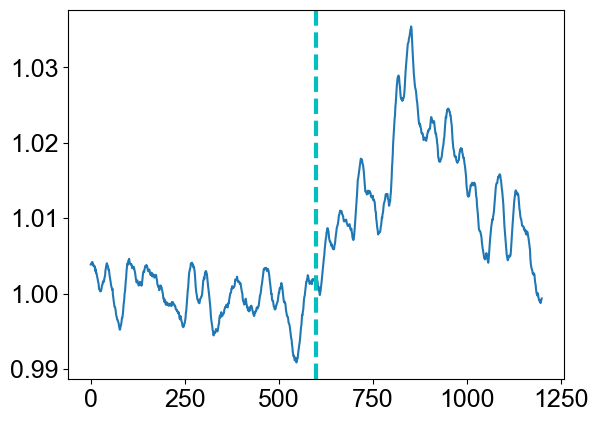

In [367]:
plt.plot(gcamp_signalright_epoch1)
plt.axvline(600,0,1,linewidth=3,color='c',linestyle='--') #Reference keydown to find spot to place line

# Calculate the baseline average and df/f for each period

In [368]:
#Calculates the average F for each baseline period prior to pellet consumption
#Since some of these values are negative this winds up giving you pretty screwy values. Will need to Z-score

#GLPright470
gcamp_signalright_epoch1_averageF = gcamp_signalright_epoch1.iloc[0:600].mean()
gcamp_signalright_epoch2_averageF = gcamp_signalright_epoch2.iloc[0:600].mean()
gcamp_signalright_epoch3_averageF = gcamp_signalright_epoch3.iloc[0:600].mean()
gcamp_signalright_epoch4_averageF = gcamp_signalright_epoch4.iloc[0:600].mean()
gcamp_signalright_epoch5_averageF = gcamp_signalright_epoch5.iloc[0:600].mean()
gcamp_signalright_epoch6_averageF = gcamp_signalright_epoch6.iloc[0:600].mean()
gcamp_signalright_epoch7_averageF = gcamp_signalright_epoch7.iloc[0:600].mean()
gcamp_signalright_epoch8_averageF = gcamp_signalright_epoch8.iloc[0:600].mean()
gcamp_signalright_epoch9_averageF = gcamp_signalright_epoch9.iloc[0:600].mean()
gcamp_signalright_epoch10_averageF = gcamp_signalright_epoch10.iloc[0:600].mean()
gcamp_signalright_epoch1_STD = gcamp_signalright_epoch1.iloc[0:600].std()
gcamp_signalright_epoch2_STD = gcamp_signalright_epoch2.iloc[0:600].std()
gcamp_signalright_epoch3_STD = gcamp_signalright_epoch3.iloc[0:600].std()
gcamp_signalright_epoch4_STD = gcamp_signalright_epoch4.iloc[0:600].std()
gcamp_signalright_epoch5_STD = gcamp_signalright_epoch5.iloc[0:600].std()
gcamp_signalright_epoch6_STD = gcamp_signalright_epoch6.iloc[0:600].std()
gcamp_signalright_epoch7_STD = gcamp_signalright_epoch7.iloc[0:600].std()
gcamp_signalright_epoch8_STD = gcamp_signalright_epoch8.iloc[0:600].std()
gcamp_signalright_epoch9_STD = gcamp_signalright_epoch9.iloc[0:600].std()
gcamp_signalright_epoch10_STD = gcamp_signalright_epoch10.iloc[0:600].std()

gcamp_signalright_epoch11_averageF = gcamp_signalright_epoch11.iloc[0:600].mean()
gcamp_signalright_epoch12_averageF = gcamp_signalright_epoch12.iloc[0:600].mean()
gcamp_signalright_epoch13_averageF = gcamp_signalright_epoch13.iloc[0:600].mean()
gcamp_signalright_epoch14_averageF = gcamp_signalright_epoch14.iloc[0:600].mean()
gcamp_signalright_epoch15_averageF = gcamp_signalright_epoch15.iloc[0:600].mean()
gcamp_signalright_epoch16_averageF = gcamp_signalright_epoch16.iloc[0:600].mean()
gcamp_signalright_epoch17_averageF = gcamp_signalright_epoch17.iloc[0:600].mean()
gcamp_signalright_epoch18_averageF = gcamp_signalright_epoch18.iloc[0:600].mean()
gcamp_signalright_epoch19_averageF = gcamp_signalright_epoch19.iloc[0:600].mean()
gcamp_signalright_epoch20_averageF = gcamp_signalright_epoch20.iloc[0:600].mean()
gcamp_signalright_epoch11_STD = gcamp_signalright_epoch11.iloc[0:600].std()
gcamp_signalright_epoch12_STD = gcamp_signalright_epoch12.iloc[0:600].std()
gcamp_signalright_epoch13_STD = gcamp_signalright_epoch13.iloc[0:600].std()
gcamp_signalright_epoch14_STD = gcamp_signalright_epoch14.iloc[0:600].std()
gcamp_signalright_epoch15_STD = gcamp_signalright_epoch15.iloc[0:600].std()
gcamp_signalright_epoch16_STD = gcamp_signalright_epoch16.iloc[0:600].std()
gcamp_signalright_epoch17_STD = gcamp_signalright_epoch17.iloc[0:600].std()
gcamp_signalright_epoch18_STD = gcamp_signalright_epoch18.iloc[0:600].std()
gcamp_signalright_epoch19_STD = gcamp_signalright_epoch19.iloc[0:600].std()
gcamp_signalright_epoch20_STD = gcamp_signalright_epoch20.iloc[0:600].std()

gcamp_signalright_epoch21_averageF = gcamp_signalright_epoch21.iloc[0:600].mean()
gcamp_signalright_epoch22_averageF = gcamp_signalright_epoch22.iloc[0:600].mean()
gcamp_signalright_epoch23_averageF = gcamp_signalright_epoch23.iloc[0:600].mean()
gcamp_signalright_epoch24_averageF = gcamp_signalright_epoch24.iloc[0:600].mean()
gcamp_signalright_epoch25_averageF = gcamp_signalright_epoch25.iloc[0:600].mean()
gcamp_signalright_epoch26_averageF = gcamp_signalright_epoch26.iloc[0:600].mean()
gcamp_signalright_epoch27_averageF = gcamp_signalright_epoch27.iloc[0:600].mean()
gcamp_signalright_epoch28_averageF = gcamp_signalright_epoch28.iloc[0:600].mean()
gcamp_signalright_epoch21_STD = gcamp_signalright_epoch21.iloc[0:600].std()
gcamp_signalright_epoch22_STD = gcamp_signalright_epoch22.iloc[0:600].std()
gcamp_signalright_epoch23_STD = gcamp_signalright_epoch23.iloc[0:600].std()
gcamp_signalright_epoch24_STD = gcamp_signalright_epoch24.iloc[0:600].std()
gcamp_signalright_epoch25_STD = gcamp_signalright_epoch25.iloc[0:600].std()
gcamp_signalright_epoch26_STD = gcamp_signalright_epoch26.iloc[0:600].std()
gcamp_signalright_epoch27_STD = gcamp_signalright_epoch27.iloc[0:600].std()
gcamp_signalright_epoch28_STD = gcamp_signalright_epoch28.iloc[0:600].std()

#GLPleft470
gcamp_signalleft_epoch1_averageF = gcamp_signalleft_epoch1.iloc[0:600].mean()
gcamp_signalleft_epoch2_averageF = gcamp_signalleft_epoch2.iloc[0:600].mean()
gcamp_signalleft_epoch3_averageF = gcamp_signalleft_epoch3.iloc[0:600].mean()
gcamp_signalleft_epoch4_averageF = gcamp_signalleft_epoch4.iloc[0:600].mean()
gcamp_signalleft_epoch5_averageF = gcamp_signalleft_epoch5.iloc[0:600].mean()
gcamp_signalleft_epoch6_averageF = gcamp_signalleft_epoch6.iloc[0:600].mean()
gcamp_signalleft_epoch7_averageF = gcamp_signalleft_epoch7.iloc[0:600].mean()
gcamp_signalleft_epoch8_averageF = gcamp_signalleft_epoch8.iloc[0:600].mean()
gcamp_signalleft_epoch9_averageF = gcamp_signalleft_epoch9.iloc[0:600].mean()
gcamp_signalleft_epoch10_averageF = gcamp_signalleft_epoch10.iloc[0:600].mean()
gcamp_signalleft_epoch1_STD = gcamp_signalleft_epoch1.iloc[0:600].std()
gcamp_signalleft_epoch2_STD = gcamp_signalleft_epoch2.iloc[0:600].std()
gcamp_signalleft_epoch3_STD = gcamp_signalleft_epoch3.iloc[0:600].std()
gcamp_signalleft_epoch4_STD = gcamp_signalleft_epoch4.iloc[0:600].std()
gcamp_signalleft_epoch5_STD = gcamp_signalleft_epoch5.iloc[0:600].std()
gcamp_signalleft_epoch6_STD = gcamp_signalleft_epoch6.iloc[0:600].std()
gcamp_signalleft_epoch7_STD = gcamp_signalleft_epoch7.iloc[0:600].std()
gcamp_signalleft_epoch8_STD = gcamp_signalleft_epoch8.iloc[0:600].std()
gcamp_signalleft_epoch9_STD = gcamp_signalleft_epoch9.iloc[0:600].std()
gcamp_signalleft_epoch10_STD = gcamp_signalleft_epoch10.iloc[0:600].std()

gcamp_signalleft_epoch11_averageF = gcamp_signalleft_epoch11.iloc[0:600].mean()
gcamp_signalleft_epoch12_averageF = gcamp_signalleft_epoch12.iloc[0:600].mean()
gcamp_signalleft_epoch13_averageF = gcamp_signalleft_epoch13.iloc[0:600].mean()
gcamp_signalleft_epoch14_averageF = gcamp_signalleft_epoch14.iloc[0:600].mean()
gcamp_signalleft_epoch15_averageF = gcamp_signalleft_epoch15.iloc[0:600].mean()
gcamp_signalleft_epoch16_averageF = gcamp_signalleft_epoch16.iloc[0:600].mean()
gcamp_signalleft_epoch17_averageF = gcamp_signalleft_epoch17.iloc[0:600].mean()
gcamp_signalleft_epoch18_averageF = gcamp_signalleft_epoch18.iloc[0:600].mean()
gcamp_signalleft_epoch19_averageF = gcamp_signalleft_epoch19.iloc[0:600].mean()
gcamp_signalleft_epoch20_averageF = gcamp_signalleft_epoch20.iloc[0:600].mean()
gcamp_signalleft_epoch11_STD = gcamp_signalleft_epoch11.iloc[0:600].std()
gcamp_signalleft_epoch12_STD = gcamp_signalleft_epoch12.iloc[0:600].std()
gcamp_signalleft_epoch13_STD = gcamp_signalleft_epoch13.iloc[0:600].std()
gcamp_signalleft_epoch14_STD = gcamp_signalleft_epoch14.iloc[0:600].std()
gcamp_signalleft_epoch15_STD = gcamp_signalleft_epoch15.iloc[0:600].std()
gcamp_signalleft_epoch16_STD = gcamp_signalleft_epoch16.iloc[0:600].std()
gcamp_signalleft_epoch17_STD = gcamp_signalleft_epoch17.iloc[0:600].std()
gcamp_signalleft_epoch18_STD = gcamp_signalleft_epoch18.iloc[0:600].std()
gcamp_signalleft_epoch19_STD = gcamp_signalleft_epoch19.iloc[0:600].std()
gcamp_signalleft_epoch20_STD = gcamp_signalleft_epoch20.iloc[0:600].std()

gcamp_signalleft_epoch21_averageF = gcamp_signalleft_epoch21.iloc[0:600].mean()
gcamp_signalleft_epoch22_averageF = gcamp_signalleft_epoch22.iloc[0:600].mean()
gcamp_signalleft_epoch23_averageF = gcamp_signalleft_epoch23.iloc[0:600].mean()
gcamp_signalleft_epoch24_averageF = gcamp_signalleft_epoch24.iloc[0:600].mean()
gcamp_signalleft_epoch25_averageF = gcamp_signalleft_epoch25.iloc[0:600].mean()
gcamp_signalleft_epoch26_averageF = gcamp_signalleft_epoch26.iloc[0:600].mean()
gcamp_signalleft_epoch27_averageF = gcamp_signalleft_epoch27.iloc[0:600].mean()
gcamp_signalleft_epoch28_averageF = gcamp_signalleft_epoch28.iloc[0:600].mean()
gcamp_signalleft_epoch21_STD = gcamp_signalleft_epoch21.iloc[0:600].std()
gcamp_signalleft_epoch22_STD = gcamp_signalleft_epoch22.iloc[0:600].std()
gcamp_signalleft_epoch23_STD = gcamp_signalleft_epoch23.iloc[0:600].std()
gcamp_signalleft_epoch24_STD = gcamp_signalleft_epoch24.iloc[0:600].std()
gcamp_signalleft_epoch25_STD = gcamp_signalleft_epoch25.iloc[0:600].std()
gcamp_signalleft_epoch26_STD = gcamp_signalleft_epoch26.iloc[0:600].std()
gcamp_signalleft_epoch27_STD = gcamp_signalleft_epoch27.iloc[0:600].std()
gcamp_signalleft_epoch28_STD = gcamp_signalleft_epoch28.iloc[0:600].std()


#GLPright560
rcamp_signalright_epoch1_averageF = rcamp_signalright_epoch1.iloc[0:600].mean()
rcamp_signalright_epoch2_averageF = rcamp_signalright_epoch2.iloc[0:600].mean()
rcamp_signalright_epoch3_averageF = rcamp_signalright_epoch3.iloc[0:600].mean()
rcamp_signalright_epoch4_averageF = rcamp_signalright_epoch4.iloc[0:600].mean()
rcamp_signalright_epoch5_averageF = rcamp_signalright_epoch5.iloc[0:600].mean()
rcamp_signalright_epoch6_averageF = rcamp_signalright_epoch6.iloc[0:600].mean()
rcamp_signalright_epoch7_averageF = rcamp_signalright_epoch7.iloc[0:600].mean()
rcamp_signalright_epoch8_averageF = rcamp_signalright_epoch8.iloc[0:600].mean()
rcamp_signalright_epoch9_averageF = rcamp_signalright_epoch9.iloc[0:600].mean()
rcamp_signalright_epoch10_averageF = rcamp_signalright_epoch10.iloc[0:600].mean()
rcamp_signalright_epoch1_STD = rcamp_signalright_epoch1.iloc[0:600].std()
rcamp_signalright_epoch2_STD = rcamp_signalright_epoch2.iloc[0:600].std()
rcamp_signalright_epoch3_STD = rcamp_signalright_epoch3.iloc[0:600].std()
rcamp_signalright_epoch4_STD = rcamp_signalright_epoch4.iloc[0:600].std()
rcamp_signalright_epoch5_STD = rcamp_signalright_epoch5.iloc[0:600].std()
rcamp_signalright_epoch6_STD = rcamp_signalright_epoch6.iloc[0:600].std()
rcamp_signalright_epoch7_STD = rcamp_signalright_epoch7.iloc[0:600].std()
rcamp_signalright_epoch8_STD = rcamp_signalright_epoch8.iloc[0:600].std()
rcamp_signalright_epoch9_STD = rcamp_signalright_epoch9.iloc[0:600].std()
rcamp_signalright_epoch10_STD = rcamp_signalright_epoch10.iloc[0:600].std()

rcamp_signalright_epoch11_averageF = rcamp_signalright_epoch11.iloc[0:600].mean()
rcamp_signalright_epoch12_averageF = rcamp_signalright_epoch12.iloc[0:600].mean()
rcamp_signalright_epoch13_averageF = rcamp_signalright_epoch13.iloc[0:600].mean()
rcamp_signalright_epoch14_averageF = rcamp_signalright_epoch14.iloc[0:600].mean()
rcamp_signalright_epoch15_averageF = rcamp_signalright_epoch15.iloc[0:600].mean()
rcamp_signalright_epoch16_averageF = rcamp_signalright_epoch16.iloc[0:600].mean()
rcamp_signalright_epoch17_averageF = rcamp_signalright_epoch17.iloc[0:600].mean()
rcamp_signalright_epoch18_averageF = rcamp_signalright_epoch18.iloc[0:600].mean()
rcamp_signalright_epoch19_averageF = rcamp_signalright_epoch19.iloc[0:600].mean()
rcamp_signalright_epoch20_averageF = rcamp_signalright_epoch20.iloc[0:600].mean()
rcamp_signalright_epoch11_STD = rcamp_signalright_epoch11.iloc[0:600].std()
rcamp_signalright_epoch12_STD = rcamp_signalright_epoch12.iloc[0:600].std()
rcamp_signalright_epoch13_STD = rcamp_signalright_epoch13.iloc[0:600].std()
rcamp_signalright_epoch14_STD = rcamp_signalright_epoch14.iloc[0:600].std()
rcamp_signalright_epoch15_STD = rcamp_signalright_epoch15.iloc[0:600].std()
rcamp_signalright_epoch16_STD = rcamp_signalright_epoch16.iloc[0:600].std()
rcamp_signalright_epoch17_STD = rcamp_signalright_epoch17.iloc[0:600].std()
rcamp_signalright_epoch18_STD = rcamp_signalright_epoch18.iloc[0:600].std()
rcamp_signalright_epoch19_STD = rcamp_signalright_epoch19.iloc[0:600].std()
rcamp_signalright_epoch20_STD = rcamp_signalright_epoch20.iloc[0:600].std()

rcamp_signalright_epoch21_averageF = rcamp_signalright_epoch21.iloc[0:600].mean()
rcamp_signalright_epoch22_averageF = rcamp_signalright_epoch22.iloc[0:600].mean()
rcamp_signalright_epoch23_averageF = rcamp_signalright_epoch23.iloc[0:600].mean()
rcamp_signalright_epoch24_averageF = rcamp_signalright_epoch24.iloc[0:600].mean()
rcamp_signalright_epoch25_averageF = rcamp_signalright_epoch25.iloc[0:600].mean()
rcamp_signalright_epoch26_averageF = rcamp_signalright_epoch26.iloc[0:600].mean()
rcamp_signalright_epoch27_averageF = rcamp_signalright_epoch27.iloc[0:600].mean()
rcamp_signalright_epoch28_averageF = rcamp_signalright_epoch28.iloc[0:600].mean()
rcamp_signalright_epoch21_STD = rcamp_signalright_epoch21.iloc[0:600].std()
rcamp_signalright_epoch22_STD = rcamp_signalright_epoch22.iloc[0:600].std()
rcamp_signalright_epoch23_STD = rcamp_signalright_epoch23.iloc[0:600].std()
rcamp_signalright_epoch24_STD = rcamp_signalright_epoch24.iloc[0:600].std()
rcamp_signalright_epoch25_STD = rcamp_signalright_epoch25.iloc[0:600].std()
rcamp_signalright_epoch26_STD = rcamp_signalright_epoch26.iloc[0:600].std()
rcamp_signalright_epoch27_STD = rcamp_signalright_epoch27.iloc[0:600].std()
rcamp_signalright_epoch28_STD = rcamp_signalright_epoch28.iloc[0:600].std()


#GLPleft560
rcamp_signalleft_epoch1_averageF = rcamp_signalleft_epoch1.iloc[0:600].mean()
rcamp_signalleft_epoch2_averageF = rcamp_signalleft_epoch2.iloc[0:600].mean()
rcamp_signalleft_epoch3_averageF = rcamp_signalleft_epoch3.iloc[0:600].mean()
rcamp_signalleft_epoch4_averageF = rcamp_signalleft_epoch4.iloc[0:600].mean()
rcamp_signalleft_epoch5_averageF = rcamp_signalleft_epoch5.iloc[0:600].mean()
rcamp_signalleft_epoch6_averageF = rcamp_signalleft_epoch6.iloc[0:600].mean()
rcamp_signalleft_epoch7_averageF = rcamp_signalleft_epoch7.iloc[0:600].mean()
rcamp_signalleft_epoch8_averageF = rcamp_signalleft_epoch8.iloc[0:600].mean()
rcamp_signalleft_epoch9_averageF = rcamp_signalleft_epoch9.iloc[0:600].mean()
rcamp_signalleft_epoch10_averageF = rcamp_signalleft_epoch10.iloc[0:600].mean()
rcamp_signalleft_epoch1_STD = rcamp_signalleft_epoch1.iloc[0:600].std()
rcamp_signalleft_epoch2_STD = rcamp_signalleft_epoch2.iloc[0:600].std()
rcamp_signalleft_epoch3_STD = rcamp_signalleft_epoch3.iloc[0:600].std()
rcamp_signalleft_epoch4_STD = rcamp_signalleft_epoch4.iloc[0:600].std()
rcamp_signalleft_epoch5_STD = rcamp_signalleft_epoch5.iloc[0:600].std()
rcamp_signalleft_epoch6_STD = rcamp_signalleft_epoch6.iloc[0:600].std()
rcamp_signalleft_epoch7_STD = rcamp_signalleft_epoch7.iloc[0:600].std()
rcamp_signalleft_epoch8_STD = rcamp_signalleft_epoch8.iloc[0:600].std()
rcamp_signalleft_epoch9_STD = rcamp_signalleft_epoch9.iloc[0:600].std()
rcamp_signalleft_epoch10_STD = rcamp_signalleft_epoch10.iloc[0:600].std()

rcamp_signalleft_epoch11_averageF = rcamp_signalleft_epoch11.iloc[0:600].mean()
rcamp_signalleft_epoch12_averageF = rcamp_signalleft_epoch12.iloc[0:600].mean()
rcamp_signalleft_epoch13_averageF = rcamp_signalleft_epoch13.iloc[0:600].mean()
rcamp_signalleft_epoch14_averageF = rcamp_signalleft_epoch14.iloc[0:600].mean()
rcamp_signalleft_epoch15_averageF = rcamp_signalleft_epoch15.iloc[0:600].mean()
rcamp_signalleft_epoch16_averageF = rcamp_signalleft_epoch16.iloc[0:600].mean()
rcamp_signalleft_epoch17_averageF = rcamp_signalleft_epoch17.iloc[0:600].mean()
rcamp_signalleft_epoch18_averageF = rcamp_signalleft_epoch18.iloc[0:600].mean()
rcamp_signalleft_epoch19_averageF = rcamp_signalleft_epoch19.iloc[0:600].mean()
rcamp_signalleft_epoch20_averageF = rcamp_signalleft_epoch20.iloc[0:600].mean()
rcamp_signalleft_epoch11_STD = rcamp_signalleft_epoch11.iloc[0:600].std()
rcamp_signalleft_epoch12_STD = rcamp_signalleft_epoch12.iloc[0:600].std()
rcamp_signalleft_epoch13_STD = rcamp_signalleft_epoch13.iloc[0:600].std()
rcamp_signalleft_epoch14_STD = rcamp_signalleft_epoch14.iloc[0:600].std()
rcamp_signalleft_epoch15_STD = rcamp_signalleft_epoch15.iloc[0:600].std()
rcamp_signalleft_epoch16_STD = rcamp_signalleft_epoch16.iloc[0:600].std()
rcamp_signalleft_epoch17_STD = rcamp_signalleft_epoch17.iloc[0:600].std()
rcamp_signalleft_epoch18_STD = rcamp_signalleft_epoch18.iloc[0:600].std()
rcamp_signalleft_epoch19_STD = rcamp_signalleft_epoch19.iloc[0:600].std()
rcamp_signalleft_epoch20_STD = rcamp_signalleft_epoch20.iloc[0:600].std()

rcamp_signalleft_epoch21_averageF = rcamp_signalleft_epoch21.iloc[0:600].mean()
rcamp_signalleft_epoch22_averageF = rcamp_signalleft_epoch22.iloc[0:600].mean()
rcamp_signalleft_epoch23_averageF = rcamp_signalleft_epoch23.iloc[0:600].mean()
rcamp_signalleft_epoch24_averageF = rcamp_signalleft_epoch24.iloc[0:600].mean()
rcamp_signalleft_epoch25_averageF = rcamp_signalleft_epoch25.iloc[0:600].mean()
rcamp_signalleft_epoch26_averageF = rcamp_signalleft_epoch26.iloc[0:600].mean()
rcamp_signalleft_epoch27_averageF = rcamp_signalleft_epoch27.iloc[0:600].mean()
rcamp_signalleft_epoch28_averageF = rcamp_signalleft_epoch28.iloc[0:600].mean()
rcamp_signalleft_epoch21_STD = rcamp_signalleft_epoch21.iloc[0:600].std()
rcamp_signalleft_epoch22_STD = rcamp_signalleft_epoch22.iloc[0:600].std()
rcamp_signalleft_epoch23_STD = rcamp_signalleft_epoch23.iloc[0:600].std()
rcamp_signalleft_epoch24_STD = rcamp_signalleft_epoch24.iloc[0:600].std()
rcamp_signalleft_epoch25_STD = rcamp_signalleft_epoch25.iloc[0:600].std()
rcamp_signalleft_epoch26_STD = rcamp_signalleft_epoch26.iloc[0:600].std()
rcamp_signalleft_epoch27_STD = rcamp_signalleft_epoch27.iloc[0:600].std()
rcamp_signalleft_epoch28_STD = rcamp_signalleft_epoch28.iloc[0:600].std()

In [369]:
print(gcamp_signalright_epoch1_averageF[0])
print(gcamp_signalright_epoch1_STD[0])
print(gcamp_signalleft_epoch1_averageF[0])
print(gcamp_signalleft_epoch1_STD[0])
print(rcamp_signalright_epoch1_averageF[0])
print(rcamp_signalright_epoch1_STD[0])
print(rcamp_signalleft_epoch1_averageF[0])
print(rcamp_signalleft_epoch1_STD[0])

print(gcamp_signalright_epoch2_averageF[0])
print(gcamp_signalright_epoch2_STD[0])
print(gcamp_signalleft_epoch2_averageF[0])
print(gcamp_signalleft_epoch2_STD[0])
print(rcamp_signalright_epoch2_averageF[0])
print(rcamp_signalright_epoch2_STD[0])
print(rcamp_signalleft_epoch2_averageF[0])
print(rcamp_signalleft_epoch2_STD[0])

print(gcamp_signalright_epoch3_averageF[0])
print(gcamp_signalright_epoch3_STD[0])
print(gcamp_signalleft_epoch3_averageF[0])
print(gcamp_signalleft_epoch3_STD[0])
print(rcamp_signalright_epoch3_averageF[0])
print(rcamp_signalright_epoch3_STD[0])
print(rcamp_signalleft_epoch3_averageF[0])
print(rcamp_signalleft_epoch3_STD[0])

print(gcamp_signalright_epoch4_averageF[0])
print(gcamp_signalright_epoch4_STD[0])
print(gcamp_signalleft_epoch4_averageF[0])
print(gcamp_signalleft_epoch4_STD[0])
print(rcamp_signalright_epoch4_averageF[0])
print(rcamp_signalright_epoch4_STD[0])
print(rcamp_signalleft_epoch4_averageF[0])
print(rcamp_signalleft_epoch4_STD[0])

print(gcamp_signalright_epoch5_averageF[0])
print(gcamp_signalright_epoch5_STD[0])
print(gcamp_signalleft_epoch5_averageF[0])
print(gcamp_signalleft_epoch5_STD[0])
print(rcamp_signalright_epoch5_averageF[0])
print(rcamp_signalright_epoch5_STD[0])
print(rcamp_signalleft_epoch5_averageF[0])
print(rcamp_signalleft_epoch5_STD[0])

print(gcamp_signalright_epoch6_averageF[0])
print(gcamp_signalright_epoch6_STD[0])
print(gcamp_signalleft_epoch6_averageF[0])
print(gcamp_signalleft_epoch6_STD[0])
print(rcamp_signalright_epoch6_averageF[0])
print(rcamp_signalright_epoch6_STD[0])
print(rcamp_signalleft_epoch6_averageF[0])
print(rcamp_signalleft_epoch6_STD[0])

print(gcamp_signalright_epoch7_averageF[0])
print(gcamp_signalright_epoch7_STD[0])
print(gcamp_signalleft_epoch7_averageF[0])
print(gcamp_signalleft_epoch7_STD[0])
print(rcamp_signalright_epoch7_averageF[0])
print(rcamp_signalright_epoch7_STD[0])
print(rcamp_signalleft_epoch7_averageF[0])
print(rcamp_signalleft_epoch7_STD[0])

print(gcamp_signalright_epoch8_averageF[0])
print(gcamp_signalright_epoch8_STD[0])
print(gcamp_signalleft_epoch8_averageF[0])
print(gcamp_signalleft_epoch8_STD[0])
print(rcamp_signalright_epoch8_averageF[0])
print(rcamp_signalright_epoch8_STD[0])
print(rcamp_signalleft_epoch8_averageF[0])
print(rcamp_signalleft_epoch8_STD[0])

print(gcamp_signalright_epoch9_averageF[0])
print(gcamp_signalright_epoch9_STD[0])
print(gcamp_signalleft_epoch9_averageF[0])
print(gcamp_signalleft_epoch9_STD[0])
print(rcamp_signalright_epoch9_averageF[0])
print(rcamp_signalright_epoch9_STD[0])
print(rcamp_signalleft_epoch9_averageF[0])
print(rcamp_signalleft_epoch9_STD[0])

print(gcamp_signalright_epoch10_averageF[0])
print(gcamp_signalright_epoch10_STD[0])
print(gcamp_signalleft_epoch10_averageF[0])
print(gcamp_signalleft_epoch10_STD[0])
print(rcamp_signalright_epoch10_averageF[0])
print(rcamp_signalright_epoch10_STD[0])
print(rcamp_signalleft_epoch10_averageF[0])
print(rcamp_signalleft_epoch10_STD[0])

print(gcamp_signalright_epoch11_averageF[0])
print(gcamp_signalright_epoch11_STD[0])
print(gcamp_signalleft_epoch11_averageF[0])
print(gcamp_signalleft_epoch11_STD[0])
print(rcamp_signalright_epoch11_averageF[0])
print(rcamp_signalright_epoch11_STD[0])
print(rcamp_signalleft_epoch11_averageF[0])
print(rcamp_signalleft_epoch11_STD[0])

print(gcamp_signalright_epoch12_averageF[0])
print(gcamp_signalright_epoch12_STD[0])
print(gcamp_signalleft_epoch12_averageF[0])
print(gcamp_signalleft_epoch12_STD[0])
print(rcamp_signalright_epoch12_averageF[0])
print(rcamp_signalright_epoch12_STD[0])
print(rcamp_signalleft_epoch12_averageF[0])
print(rcamp_signalleft_epoch12_STD[0])

print(gcamp_signalright_epoch13_averageF[0])
print(gcamp_signalright_epoch13_STD[0])
print(gcamp_signalleft_epoch13_averageF[0])
print(gcamp_signalleft_epoch13_STD[0])
print(rcamp_signalright_epoch13_averageF[0])
print(rcamp_signalright_epoch13_STD[0])
print(rcamp_signalleft_epoch13_averageF[0])
print(rcamp_signalleft_epoch13_STD[0])

print(gcamp_signalright_epoch14_averageF[0])
print(gcamp_signalright_epoch14_STD[0])
print(gcamp_signalleft_epoch14_averageF[0])
print(gcamp_signalleft_epoch14_STD[0])
print(rcamp_signalright_epoch14_averageF[0])
print(rcamp_signalright_epoch14_STD[0])
print(rcamp_signalleft_epoch14_averageF[0])
print(rcamp_signalleft_epoch14_STD[0])

print(gcamp_signalright_epoch15_averageF[0])
print(gcamp_signalright_epoch15_STD[0])
print(gcamp_signalleft_epoch15_averageF[0])
print(gcamp_signalleft_epoch15_STD[0])
print(rcamp_signalright_epoch15_averageF[0])
print(rcamp_signalright_epoch15_STD[0])
print(rcamp_signalleft_epoch15_averageF[0])
print(rcamp_signalleft_epoch15_STD[0])

print(gcamp_signalright_epoch16_averageF[0])
print(gcamp_signalright_epoch16_STD[0])
print(gcamp_signalleft_epoch16_averageF[0])
print(gcamp_signalleft_epoch16_STD[0])
print(rcamp_signalright_epoch16_averageF[0])
print(rcamp_signalright_epoch16_STD[0])
print(rcamp_signalleft_epoch16_averageF[0])
print(rcamp_signalleft_epoch16_STD[0])

print(gcamp_signalright_epoch17_averageF[0])
print(gcamp_signalright_epoch17_STD[0])
print(gcamp_signalleft_epoch17_averageF[0])
print(gcamp_signalleft_epoch17_STD[0])
print(rcamp_signalright_epoch17_averageF[0])
print(rcamp_signalright_epoch17_STD[0])
print(rcamp_signalleft_epoch17_averageF[0])
print(rcamp_signalleft_epoch17_STD[0])

print(gcamp_signalright_epoch18_averageF[0])
print(gcamp_signalright_epoch18_STD[0])
print(gcamp_signalleft_epoch18_averageF[0])
print(gcamp_signalleft_epoch18_STD[0])
print(rcamp_signalright_epoch18_averageF[0])
print(rcamp_signalright_epoch18_STD[0])
print(rcamp_signalleft_epoch18_averageF[0])
print(rcamp_signalleft_epoch18_STD[0])

print(gcamp_signalright_epoch19_averageF[0])
print(gcamp_signalright_epoch19_STD[0])
print(gcamp_signalleft_epoch19_averageF[0])
print(gcamp_signalleft_epoch19_STD[0])
print(rcamp_signalright_epoch19_averageF[0])
print(rcamp_signalright_epoch19_STD[0])
print(rcamp_signalleft_epoch19_averageF[0])
print(rcamp_signalleft_epoch19_STD[0])

print(gcamp_signalright_epoch20_averageF[0])
print(gcamp_signalright_epoch20_STD[0])
print(gcamp_signalleft_epoch20_averageF[0])
print(gcamp_signalleft_epoch20_STD[0])
print(rcamp_signalright_epoch20_averageF[0])
print(rcamp_signalright_epoch20_STD[0])
print(rcamp_signalleft_epoch20_averageF[0])
print(rcamp_signalleft_epoch20_STD[0])

print(gcamp_signalright_epoch21_averageF[0])
print(gcamp_signalright_epoch21_STD[0])
print(gcamp_signalleft_epoch21_averageF[0])
print(gcamp_signalleft_epoch21_STD[0])
print(rcamp_signalright_epoch21_averageF[0])
print(rcamp_signalright_epoch21_STD[0])
print(rcamp_signalleft_epoch21_averageF[0])
print(rcamp_signalleft_epoch21_STD[0])

print(gcamp_signalright_epoch22_averageF[0])
print(gcamp_signalright_epoch22_STD[0])
print(gcamp_signalleft_epoch22_averageF[0])
print(gcamp_signalleft_epoch22_STD[0])
print(rcamp_signalright_epoch22_averageF[0])
print(rcamp_signalright_epoch22_STD[0])
print(rcamp_signalleft_epoch22_averageF[0])
print(rcamp_signalleft_epoch22_STD[0])

print(gcamp_signalright_epoch23_averageF[0])
print(gcamp_signalright_epoch23_STD[0])
print(gcamp_signalleft_epoch23_averageF[0])
print(gcamp_signalleft_epoch23_STD[0])
print(rcamp_signalright_epoch23_averageF[0])
print(rcamp_signalright_epoch23_STD[0])
print(rcamp_signalleft_epoch23_averageF[0])
print(rcamp_signalleft_epoch23_STD[0])

print(gcamp_signalright_epoch24_averageF[0])
print(gcamp_signalright_epoch24_STD[0])
print(gcamp_signalleft_epoch24_averageF[0])
print(gcamp_signalleft_epoch24_STD[0])
print(rcamp_signalright_epoch24_averageF[0])
print(rcamp_signalright_epoch24_STD[0])
print(rcamp_signalleft_epoch24_averageF[0])
print(rcamp_signalleft_epoch24_STD[0])

print(gcamp_signalright_epoch25_averageF[0])
print(gcamp_signalright_epoch25_STD[0])
print(gcamp_signalleft_epoch25_averageF[0])
print(gcamp_signalleft_epoch25_STD[0])
print(rcamp_signalright_epoch25_averageF[0])
print(rcamp_signalright_epoch25_STD[0])
print(rcamp_signalleft_epoch25_averageF[0])
print(rcamp_signalleft_epoch25_STD[0])

print(gcamp_signalright_epoch26_averageF[0])
print(gcamp_signalright_epoch26_STD[0])
print(gcamp_signalleft_epoch26_averageF[0])
print(gcamp_signalleft_epoch26_STD[0])
print(rcamp_signalright_epoch26_averageF[0])
print(rcamp_signalright_epoch26_STD[0])
print(rcamp_signalleft_epoch26_averageF[0])
print(rcamp_signalleft_epoch26_STD[0])

print(gcamp_signalright_epoch27_averageF[0])
print(gcamp_signalright_epoch27_STD[0])
print(gcamp_signalleft_epoch27_averageF[0])
print(gcamp_signalleft_epoch27_STD[0])
print(rcamp_signalright_epoch27_averageF[0])
print(rcamp_signalright_epoch27_STD[0])
print(rcamp_signalleft_epoch27_averageF[0])
print(rcamp_signalleft_epoch27_STD[0])

print(gcamp_signalright_epoch28_averageF[0])
print(gcamp_signalright_epoch28_STD[0])
print(gcamp_signalleft_epoch28_averageF[0])
print(gcamp_signalleft_epoch28_STD[0])
print(rcamp_signalright_epoch28_averageF[0])
print(rcamp_signalright_epoch28_STD[0])
print(rcamp_signalleft_epoch28_averageF[0])
print(rcamp_signalleft_epoch28_STD[0])

0.9997229124684884
0.002916547463658433
0.9928350462612832
0.008209775966217444
1.0119949575325713
0.00723549357173322
0.9986312073898538
0.0030572665456520013
1.0110155871257014
0.0052747190252858825
0.9967844723066392
0.007659865488431263
1.0109242522551578
0.005279551662507425
1.000650926060409
0.0005327453514822868
1.0081741926885575
0.004402969578086079
1.0028319196818611
0.007143072487024422
1.0055301946935988
0.005273845983593645
1.0004530356171324
0.000568051583530235
1.0067605152568686
0.004773251775628423
0.9958753493286626
0.008707682107511144
0.9997618023057843
0.007843955419038076
1.000395285915549
0.001200173099623712
1.0083138354368266
0.004794121629834747
1.0050996711901357
0.015793652589473375
1.0047064136931403
0.005851817386849366
1.0006945640387357
0.0006417022521497453
1.0037385190918044
0.00398116425142832
0.999266114414825
0.010716439860657057
1.0085332531877065
0.005463602446558376
1.0013202221332527
0.0007788320920184817
1.0076682272869328
0.00517683018629161
1

# Calculate normalized signal for each time range

In [370]:
#this is the z score calculation
#GLPright470
gcamp_normalizedzsignalright_epoch1 = (gcamp_signalright_epoch1 - gcamp_signalright_epoch1_averageF)/gcamp_signalright_epoch1_STD
gcamp_normalizedzsignalright_epoch2 = (gcamp_signalright_epoch2 - gcamp_signalright_epoch2_averageF)/gcamp_signalright_epoch2_STD
gcamp_normalizedzsignalright_epoch3 = (gcamp_signalright_epoch3 - gcamp_signalright_epoch3_averageF)/gcamp_signalright_epoch3_STD
gcamp_normalizedzsignalright_epoch4 = (gcamp_signalright_epoch4 - gcamp_signalright_epoch4_averageF)/gcamp_signalright_epoch4_STD
gcamp_normalizedzsignalright_epoch5 = (gcamp_signalright_epoch5 - gcamp_signalright_epoch5_averageF)/gcamp_signalright_epoch5_STD
gcamp_normalizedzsignalright_epoch6 = (gcamp_signalright_epoch6 - gcamp_signalright_epoch6_averageF)/gcamp_signalright_epoch6_STD
gcamp_normalizedzsignalright_epoch7 = (gcamp_signalright_epoch7 - gcamp_signalright_epoch7_averageF)/gcamp_signalright_epoch7_STD
gcamp_normalizedzsignalright_epoch8 = (gcamp_signalright_epoch8 - gcamp_signalright_epoch8_averageF)/gcamp_signalright_epoch8_STD
gcamp_normalizedzsignalright_epoch9 = (gcamp_signalright_epoch9 - gcamp_signalright_epoch9_averageF)/gcamp_signalright_epoch9_STD
gcamp_normalizedzsignalright_epoch10 = (gcamp_signalright_epoch10 - gcamp_signalright_epoch10_averageF)/gcamp_signalright_epoch10_STD
gcamp_normalizedzsignalright_epoch11 = (gcamp_signalright_epoch11 - gcamp_signalright_epoch11_averageF)/gcamp_signalright_epoch11_STD
gcamp_normalizedzsignalright_epoch12 = (gcamp_signalright_epoch12 - gcamp_signalright_epoch12_averageF)/gcamp_signalright_epoch12_STD
gcamp_normalizedzsignalright_epoch13 = (gcamp_signalright_epoch13 - gcamp_signalright_epoch13_averageF)/gcamp_signalright_epoch13_STD
gcamp_normalizedzsignalright_epoch14 = (gcamp_signalright_epoch14 - gcamp_signalright_epoch14_averageF)/gcamp_signalright_epoch14_STD
gcamp_normalizedzsignalright_epoch15 = (gcamp_signalright_epoch15 - gcamp_signalright_epoch15_averageF)/gcamp_signalright_epoch15_STD
gcamp_normalizedzsignalright_epoch16 = (gcamp_signalright_epoch16 - gcamp_signalright_epoch16_averageF)/gcamp_signalright_epoch16_STD
gcamp_normalizedzsignalright_epoch17 = (gcamp_signalright_epoch17 - gcamp_signalright_epoch17_averageF)/gcamp_signalright_epoch17_STD
gcamp_normalizedzsignalright_epoch18 = (gcamp_signalright_epoch18 - gcamp_signalright_epoch18_averageF)/gcamp_signalright_epoch18_STD
gcamp_normalizedzsignalright_epoch19 = (gcamp_signalright_epoch19 - gcamp_signalright_epoch19_averageF)/gcamp_signalright_epoch19_STD
gcamp_normalizedzsignalright_epoch20 = (gcamp_signalright_epoch20 - gcamp_signalright_epoch20_averageF)/gcamp_signalright_epoch20_STD
gcamp_normalizedzsignalright_epoch21 = (gcamp_signalright_epoch21 - gcamp_signalright_epoch21_averageF)/gcamp_signalright_epoch21_STD
gcamp_normalizedzsignalright_epoch22 = (gcamp_signalright_epoch22 - gcamp_signalright_epoch22_averageF)/gcamp_signalright_epoch22_STD
gcamp_normalizedzsignalright_epoch23 = (gcamp_signalright_epoch23 - gcamp_signalright_epoch23_averageF)/gcamp_signalright_epoch23_STD
gcamp_normalizedzsignalright_epoch24 = (gcamp_signalright_epoch24 - gcamp_signalright_epoch24_averageF)/gcamp_signalright_epoch24_STD
gcamp_normalizedzsignalright_epoch25 = (gcamp_signalright_epoch25 - gcamp_signalright_epoch25_averageF)/gcamp_signalright_epoch25_STD
gcamp_normalizedzsignalright_epoch26 = (gcamp_signalright_epoch26 - gcamp_signalright_epoch26_averageF)/gcamp_signalright_epoch26_STD
gcamp_normalizedzsignalright_epoch27 = (gcamp_signalright_epoch27 - gcamp_signalright_epoch27_averageF)/gcamp_signalright_epoch27_STD
gcamp_normalizedzsignalright_epoch28 = (gcamp_signalright_epoch28 - gcamp_signalright_epoch28_averageF)/gcamp_signalright_epoch28_STD


#GLPleft470
gcamp_normalizedzsignalleft_epoch1 = (gcamp_signalleft_epoch1 - gcamp_signalleft_epoch1_averageF)/gcamp_signalleft_epoch1_STD
gcamp_normalizedzsignalleft_epoch2 = (gcamp_signalleft_epoch2 - gcamp_signalleft_epoch2_averageF)/gcamp_signalleft_epoch2_STD
gcamp_normalizedzsignalleft_epoch3 = (gcamp_signalleft_epoch3 - gcamp_signalleft_epoch3_averageF)/gcamp_signalleft_epoch3_STD
gcamp_normalizedzsignalleft_epoch4 = (gcamp_signalleft_epoch4 - gcamp_signalleft_epoch4_averageF)/gcamp_signalleft_epoch4_STD
gcamp_normalizedzsignalleft_epoch5 = (gcamp_signalleft_epoch5 - gcamp_signalleft_epoch5_averageF)/gcamp_signalleft_epoch5_STD
gcamp_normalizedzsignalleft_epoch6 = (gcamp_signalleft_epoch6 - gcamp_signalleft_epoch6_averageF)/gcamp_signalleft_epoch6_STD
gcamp_normalizedzsignalleft_epoch7 = (gcamp_signalleft_epoch7 - gcamp_signalleft_epoch7_averageF)/gcamp_signalleft_epoch7_STD
gcamp_normalizedzsignalleft_epoch8 = (gcamp_signalleft_epoch8 - gcamp_signalleft_epoch8_averageF)/gcamp_signalleft_epoch8_STD
gcamp_normalizedzsignalleft_epoch9 = (gcamp_signalleft_epoch9 - gcamp_signalleft_epoch9_averageF)/gcamp_signalleft_epoch9_STD
gcamp_normalizedzsignalleft_epoch10 = (gcamp_signalleft_epoch10 - gcamp_signalleft_epoch10_averageF)/gcamp_signalleft_epoch10_STD
gcamp_normalizedzsignalleft_epoch11 = (gcamp_signalleft_epoch11 - gcamp_signalleft_epoch11_averageF)/gcamp_signalleft_epoch11_STD
gcamp_normalizedzsignalleft_epoch12 = (gcamp_signalleft_epoch12 - gcamp_signalleft_epoch12_averageF)/gcamp_signalleft_epoch12_STD
gcamp_normalizedzsignalleft_epoch13 = (gcamp_signalleft_epoch13 - gcamp_signalleft_epoch13_averageF)/gcamp_signalleft_epoch13_STD
gcamp_normalizedzsignalleft_epoch14 = (gcamp_signalleft_epoch14 - gcamp_signalleft_epoch14_averageF)/gcamp_signalleft_epoch14_STD
gcamp_normalizedzsignalleft_epoch15 = (gcamp_signalleft_epoch15 - gcamp_signalleft_epoch15_averageF)/gcamp_signalleft_epoch15_STD
gcamp_normalizedzsignalleft_epoch16 = (gcamp_signalleft_epoch16 - gcamp_signalleft_epoch16_averageF)/gcamp_signalleft_epoch16_STD
gcamp_normalizedzsignalleft_epoch17 = (gcamp_signalleft_epoch17 - gcamp_signalleft_epoch17_averageF)/gcamp_signalleft_epoch17_STD
gcamp_normalizedzsignalleft_epoch18 = (gcamp_signalleft_epoch18 - gcamp_signalleft_epoch18_averageF)/gcamp_signalleft_epoch18_STD
gcamp_normalizedzsignalleft_epoch19 = (gcamp_signalleft_epoch19 - gcamp_signalleft_epoch19_averageF)/gcamp_signalleft_epoch19_STD
gcamp_normalizedzsignalleft_epoch20 = (gcamp_signalleft_epoch20 - gcamp_signalleft_epoch20_averageF)/gcamp_signalleft_epoch20_STD
gcamp_normalizedzsignalleft_epoch21 = (gcamp_signalleft_epoch21 - gcamp_signalleft_epoch21_averageF)/gcamp_signalleft_epoch21_STD
gcamp_normalizedzsignalleft_epoch22 = (gcamp_signalleft_epoch22 - gcamp_signalleft_epoch22_averageF)/gcamp_signalleft_epoch22_STD
gcamp_normalizedzsignalleft_epoch23 = (gcamp_signalleft_epoch23 - gcamp_signalleft_epoch23_averageF)/gcamp_signalleft_epoch23_STD
gcamp_normalizedzsignalleft_epoch24 = (gcamp_signalleft_epoch24 - gcamp_signalleft_epoch24_averageF)/gcamp_signalleft_epoch24_STD
gcamp_normalizedzsignalleft_epoch25 = (gcamp_signalleft_epoch25 - gcamp_signalleft_epoch25_averageF)/gcamp_signalleft_epoch25_STD
gcamp_normalizedzsignalleft_epoch26 = (gcamp_signalleft_epoch26 - gcamp_signalleft_epoch26_averageF)/gcamp_signalleft_epoch26_STD
gcamp_normalizedzsignalleft_epoch27 = (gcamp_signalleft_epoch27 - gcamp_signalleft_epoch27_averageF)/gcamp_signalleft_epoch27_STD
gcamp_normalizedzsignalleft_epoch28 = (gcamp_signalleft_epoch28 - gcamp_signalleft_epoch28_averageF)/gcamp_signalleft_epoch28_STD


#GLPright560
rcamp_normalizedzsignalright_epoch1 = (rcamp_signalright_epoch1 - rcamp_signalright_epoch1_averageF)/rcamp_signalright_epoch1_STD
rcamp_normalizedzsignalright_epoch2 = (rcamp_signalright_epoch2 - rcamp_signalright_epoch2_averageF)/rcamp_signalright_epoch2_STD
rcamp_normalizedzsignalright_epoch3 = (rcamp_signalright_epoch3 - rcamp_signalright_epoch3_averageF)/rcamp_signalright_epoch3_STD
rcamp_normalizedzsignalright_epoch4 = (rcamp_signalright_epoch4 - rcamp_signalright_epoch4_averageF)/rcamp_signalright_epoch4_STD
rcamp_normalizedzsignalright_epoch5 = (rcamp_signalright_epoch5 - rcamp_signalright_epoch5_averageF)/rcamp_signalright_epoch5_STD
rcamp_normalizedzsignalright_epoch6 = (rcamp_signalright_epoch6 - rcamp_signalright_epoch6_averageF)/rcamp_signalright_epoch6_STD
rcamp_normalizedzsignalright_epoch7 = (rcamp_signalright_epoch7 - rcamp_signalright_epoch7_averageF)/rcamp_signalright_epoch7_STD
rcamp_normalizedzsignalright_epoch8 = (rcamp_signalright_epoch8 - rcamp_signalright_epoch8_averageF)/rcamp_signalright_epoch8_STD
rcamp_normalizedzsignalright_epoch9 = (rcamp_signalright_epoch9 - rcamp_signalright_epoch9_averageF)/rcamp_signalright_epoch9_STD
rcamp_normalizedzsignalright_epoch10 = (rcamp_signalright_epoch10 - rcamp_signalright_epoch10_averageF)/rcamp_signalright_epoch10_STD
rcamp_normalizedzsignalright_epoch11 = (rcamp_signalright_epoch11 - rcamp_signalright_epoch11_averageF)/rcamp_signalright_epoch11_STD
rcamp_normalizedzsignalright_epoch12 = (rcamp_signalright_epoch12 - rcamp_signalright_epoch12_averageF)/rcamp_signalright_epoch12_STD
rcamp_normalizedzsignalright_epoch13 = (rcamp_signalright_epoch13 - rcamp_signalright_epoch13_averageF)/rcamp_signalright_epoch13_STD
rcamp_normalizedzsignalright_epoch14 = (rcamp_signalright_epoch14 - rcamp_signalright_epoch14_averageF)/rcamp_signalright_epoch14_STD
rcamp_normalizedzsignalright_epoch15 = (rcamp_signalright_epoch15 - rcamp_signalright_epoch15_averageF)/rcamp_signalright_epoch15_STD
rcamp_normalizedzsignalright_epoch16 = (rcamp_signalright_epoch16 - rcamp_signalright_epoch16_averageF)/rcamp_signalright_epoch16_STD
rcamp_normalizedzsignalright_epoch17 = (rcamp_signalright_epoch17 - rcamp_signalright_epoch17_averageF)/rcamp_signalright_epoch17_STD
rcamp_normalizedzsignalright_epoch18 = (rcamp_signalright_epoch18 - rcamp_signalright_epoch18_averageF)/rcamp_signalright_epoch18_STD
rcamp_normalizedzsignalright_epoch19 = (rcamp_signalright_epoch19 - rcamp_signalright_epoch19_averageF)/rcamp_signalright_epoch19_STD
rcamp_normalizedzsignalright_epoch20 = (rcamp_signalright_epoch20 - rcamp_signalright_epoch20_averageF)/rcamp_signalright_epoch20_STD
rcamp_normalizedzsignalright_epoch21 = (rcamp_signalright_epoch21 - rcamp_signalright_epoch21_averageF)/rcamp_signalright_epoch21_STD
rcamp_normalizedzsignalright_epoch22 = (rcamp_signalright_epoch22 - rcamp_signalright_epoch22_averageF)/rcamp_signalright_epoch22_STD
rcamp_normalizedzsignalright_epoch23 = (rcamp_signalright_epoch23 - rcamp_signalright_epoch23_averageF)/rcamp_signalright_epoch23_STD
rcamp_normalizedzsignalright_epoch24 = (rcamp_signalright_epoch24 - rcamp_signalright_epoch24_averageF)/rcamp_signalright_epoch24_STD
rcamp_normalizedzsignalright_epoch25 = (rcamp_signalright_epoch25 - rcamp_signalright_epoch25_averageF)/rcamp_signalright_epoch25_STD
rcamp_normalizedzsignalright_epoch26 = (rcamp_signalright_epoch26 - rcamp_signalright_epoch26_averageF)/rcamp_signalright_epoch26_STD
rcamp_normalizedzsignalright_epoch27 = (rcamp_signalright_epoch27 - rcamp_signalright_epoch27_averageF)/rcamp_signalright_epoch27_STD
rcamp_normalizedzsignalright_epoch28 = (rcamp_signalright_epoch28 - rcamp_signalright_epoch28_averageF)/rcamp_signalright_epoch28_STD


#GLPleft560
rcamp_normalizedzsignalleft_epoch1 = (rcamp_signalleft_epoch1 - rcamp_signalleft_epoch1_averageF)/rcamp_signalleft_epoch1_STD
rcamp_normalizedzsignalleft_epoch2 = (rcamp_signalleft_epoch2 - rcamp_signalleft_epoch2_averageF)/rcamp_signalleft_epoch2_STD
rcamp_normalizedzsignalleft_epoch3 = (rcamp_signalleft_epoch3 - rcamp_signalleft_epoch3_averageF)/rcamp_signalleft_epoch3_STD
rcamp_normalizedzsignalleft_epoch4 = (rcamp_signalleft_epoch4 - rcamp_signalleft_epoch4_averageF)/rcamp_signalleft_epoch4_STD
rcamp_normalizedzsignalleft_epoch5 = (rcamp_signalleft_epoch5 - rcamp_signalleft_epoch5_averageF)/rcamp_signalleft_epoch5_STD
rcamp_normalizedzsignalleft_epoch6 = (rcamp_signalleft_epoch6 - rcamp_signalleft_epoch6_averageF)/rcamp_signalleft_epoch6_STD
rcamp_normalizedzsignalleft_epoch7 = (rcamp_signalleft_epoch7 - rcamp_signalleft_epoch7_averageF)/rcamp_signalleft_epoch7_STD
rcamp_normalizedzsignalleft_epoch8 = (rcamp_signalleft_epoch8 - rcamp_signalleft_epoch8_averageF)/rcamp_signalleft_epoch8_STD
rcamp_normalizedzsignalleft_epoch9 = (rcamp_signalleft_epoch9 - rcamp_signalleft_epoch9_averageF)/rcamp_signalleft_epoch9_STD
rcamp_normalizedzsignalleft_epoch10 = (rcamp_signalleft_epoch10 - rcamp_signalleft_epoch10_averageF)/rcamp_signalleft_epoch10_STD
rcamp_normalizedzsignalleft_epoch11 = (rcamp_signalleft_epoch11 - rcamp_signalleft_epoch11_averageF)/rcamp_signalleft_epoch11_STD
rcamp_normalizedzsignalleft_epoch12 = (rcamp_signalleft_epoch12 - rcamp_signalleft_epoch12_averageF)/rcamp_signalleft_epoch12_STD
rcamp_normalizedzsignalleft_epoch13 = (rcamp_signalleft_epoch13 - rcamp_signalleft_epoch13_averageF)/rcamp_signalleft_epoch13_STD
rcamp_normalizedzsignalleft_epoch14 = (rcamp_signalleft_epoch14 - rcamp_signalleft_epoch14_averageF)/rcamp_signalleft_epoch14_STD
rcamp_normalizedzsignalleft_epoch15 = (rcamp_signalleft_epoch15 - rcamp_signalleft_epoch15_averageF)/rcamp_signalleft_epoch15_STD
rcamp_normalizedzsignalleft_epoch16 = (rcamp_signalleft_epoch16 - rcamp_signalleft_epoch16_averageF)/rcamp_signalleft_epoch16_STD
rcamp_normalizedzsignalleft_epoch17 = (rcamp_signalleft_epoch17 - rcamp_signalleft_epoch17_averageF)/rcamp_signalleft_epoch17_STD
rcamp_normalizedzsignalleft_epoch18 = (rcamp_signalleft_epoch18 - rcamp_signalleft_epoch18_averageF)/rcamp_signalleft_epoch18_STD
rcamp_normalizedzsignalleft_epoch19 = (rcamp_signalleft_epoch19 - rcamp_signalleft_epoch19_averageF)/rcamp_signalleft_epoch19_STD
rcamp_normalizedzsignalleft_epoch20 = (rcamp_signalleft_epoch20 - rcamp_signalleft_epoch20_averageF)/rcamp_signalleft_epoch20_STD
rcamp_normalizedzsignalleft_epoch21 = (rcamp_signalleft_epoch21 - rcamp_signalleft_epoch21_averageF)/rcamp_signalleft_epoch21_STD
rcamp_normalizedzsignalleft_epoch22 = (rcamp_signalleft_epoch22 - rcamp_signalleft_epoch22_averageF)/rcamp_signalleft_epoch22_STD
rcamp_normalizedzsignalleft_epoch23 = (rcamp_signalleft_epoch23 - rcamp_signalleft_epoch23_averageF)/rcamp_signalleft_epoch23_STD
rcamp_normalizedzsignalleft_epoch24 = (rcamp_signalleft_epoch24 - rcamp_signalleft_epoch24_averageF)/rcamp_signalleft_epoch24_STD
rcamp_normalizedzsignalleft_epoch25 = (rcamp_signalleft_epoch25 - rcamp_signalleft_epoch25_averageF)/rcamp_signalleft_epoch25_STD
rcamp_normalizedzsignalleft_epoch26 = (rcamp_signalleft_epoch26 - rcamp_signalleft_epoch26_averageF)/rcamp_signalleft_epoch26_STD
rcamp_normalizedzsignalleft_epoch27 = (rcamp_signalleft_epoch27 - rcamp_signalleft_epoch27_averageF)/rcamp_signalleft_epoch27_STD
rcamp_normalizedzsignalleft_epoch28 = (rcamp_signalleft_epoch28 - rcamp_signalleft_epoch28_averageF)/rcamp_signalleft_epoch28_STD

In [371]:
#Create merged dataframes of all epochs

allgcamprighttrials = pd.concat([gcamp_normalizedzsignalright_epoch1.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch2.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch3.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch4.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch5.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch6.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch7.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch8.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch9.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch10.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch11.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch12.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch13.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch14.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch15.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch16.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch17.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch18.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch19.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch20.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch21.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch22.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch23.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch24.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch25.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch26.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch27.iloc[:,0],
                                    gcamp_normalizedzsignalright_epoch28.iloc[:,0]],1)

allgcamplefttrials = pd.concat([gcamp_normalizedzsignalleft_epoch1.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch2.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch3.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch4.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch5.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch6.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch7.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch8.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch9.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch10.iloc[:,0],                                    
                                    gcamp_normalizedzsignalleft_epoch11.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch12.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch13.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch14.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch15.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch16.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch17.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch18.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch19.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch20.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch21.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch22.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch23.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch24.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch25.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch26.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch27.iloc[:,0],
                                    gcamp_normalizedzsignalleft_epoch28.iloc[:,0]],1)

allrcamprighttrials = pd.concat([rcamp_normalizedzsignalright_epoch1.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch2.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch3.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch4.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch5.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch6.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch7.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch8.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch9.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch10.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch11.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch12.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch13.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch14.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch15.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch16.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch17.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch18.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch19.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch20.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch21.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch22.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch23.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch24.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch25.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch26.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch27.iloc[:,0],
                                    rcamp_normalizedzsignalright_epoch28.iloc[:,0]],1)

allrcamplefttrials = pd.concat([rcamp_normalizedzsignalleft_epoch1.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch2.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch3.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch4.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch5.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch6.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch7.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch8.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch9.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch10.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch11.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch12.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch13.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch14.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch15.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch16.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch17.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch18.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch19.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch20.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch21.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch22.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch23.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch24.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch25.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch26.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch27.iloc[:,0],
                                    rcamp_normalizedzsignalleft_epoch28.iloc[:,0]],1)
print(allgcamprighttrials.to_numpy().sum())
print(allgcamplefttrials.to_numpy().sum())
print(allrcamprighttrials.to_numpy().sum())
print(allrcamplefttrials.to_numpy().sum())

12022.292965156375
1860.892370131847
-3970.069452052051
6578.909015804758


/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/3900754090.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  allgcamprighttrials = pd.concat([gcamp_normalizedzsignalright_epoch1.iloc[:,0],
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/3900754090.py:32: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  allgcamplefttrials = pd.concat([gcamp_normalizedzsignalleft_epoch1.iloc[:,0],
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/3900754090.py:61: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  allrcamprighttrials = pd.concat([rcamp_normalizedzsignalright_epoch1.iloc[:,0],
/var/folders/zg/ckz4sfjj0hjgq3jzbd9dzrh40000gn/T/ipykernel_20153/3900754090.py:90: FutureWarning: In a future version of pandas all arguments 

In [372]:
allgcamplefttrials.to_csv("SP 7-6 GCaMP Left.csv")
allgcamprighttrials.to_csv("SP 7-6 GCaMP Right.csv")
allrcamplefttrials.to_csv("SP 7-6 RCaMP Left.csv")
allrcamprighttrials.to_csv("SP 7-6 RCaMP Right.csv")

In [373]:
#Calculate Mean and SEM values for all
allgcamprighttrials['Mean'] = allgcamprighttrials.mean(axis=1)
allgcamplefttrials['Mean'] = allgcamplefttrials.mean(axis=1)
allgcamprighttrials['SEM'] = allgcamprighttrials.sem(axis=1)
allgcamplefttrials['SEM'] = allgcamplefttrials.sem(axis=1)

allrcamprighttrials['Mean'] = allrcamprighttrials.mean(axis=1)
allrcamplefttrials['Mean'] = allrcamplefttrials.mean(axis=1)
allrcamprighttrials['SEM'] = allrcamprighttrials.sem(axis=1)
allrcamplefttrials['SEM'] = allrcamplefttrials.sem(axis=1)

In [374]:
print(allgcamprighttrials.to_numpy().sum())
print(allgcamplefttrials.to_numpy().sum())
print(allrcamprighttrials.to_numpy().sum())
print(allrcamplefttrials.to_numpy().sum())

12760.843552428654
2218.3169049663034
-3851.6706572333715
7070.43493498786


In [375]:
#Seterrorfills
allgcamprighttrialslowererror = allgcamprighttrials['Mean'] + allgcamprighttrials['SEM']*-1
allgcamprighttrialsuppererror = allgcamprighttrials['Mean'] + allgcamprighttrials['SEM']*1
allgcamplefttrialslowererror = allgcamplefttrials['Mean'] + allgcamplefttrials['SEM']*-1
allgcamplefttrialsuppererror = allgcamplefttrials['Mean'] + allgcamplefttrials['SEM']*1

allrcamprighttrialslowererror = allrcamprighttrials['Mean'] + allrcamprighttrials['SEM']*-1
allrcamprighttrialsuppererror = allrcamprighttrials['Mean'] + allrcamprighttrials['SEM']*1
allrcamplefttrialslowererror = allrcamplefttrials['Mean'] + allrcamplefttrials['SEM']*-1
allrcamplefttrialsuppererror = allrcamplefttrials['Mean'] + allrcamplefttrials['SEM']*1

print(allgcamprighttrialslowererror.sum() +
      allgcamprighttrialsuppererror.sum() +
      allgcamplefttrialslowererror.sum() +
      allgcamplefttrialsuppererror.sum() +
      allrcamprighttrialslowererror.sum() +
      allrcamprighttrialsuppererror.sum() +
      allrcamplefttrialslowererror.sum() +
      allrcamplefttrialsuppererror.sum()
     )


1178.0017785029233


In [376]:
#Sets a more intuitive time x-axis
x = np.linspace(-30,30,1200)
x

array([-30.       , -29.9499583, -29.8999166, ...,  29.8999166,
        29.9499583,  30.       ])

([<matplotlib.axis.XTick at 0x28eca81c0>,
 [Text(-30, 0, '−30'),
  Text(-25, 0, '−25'),
  Text(-20, 0, '−20'),
  Text(-15, 0, '−15'),
  Text(-10, 0, '−10'),
  Text(-5, 0, '−5'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25')])

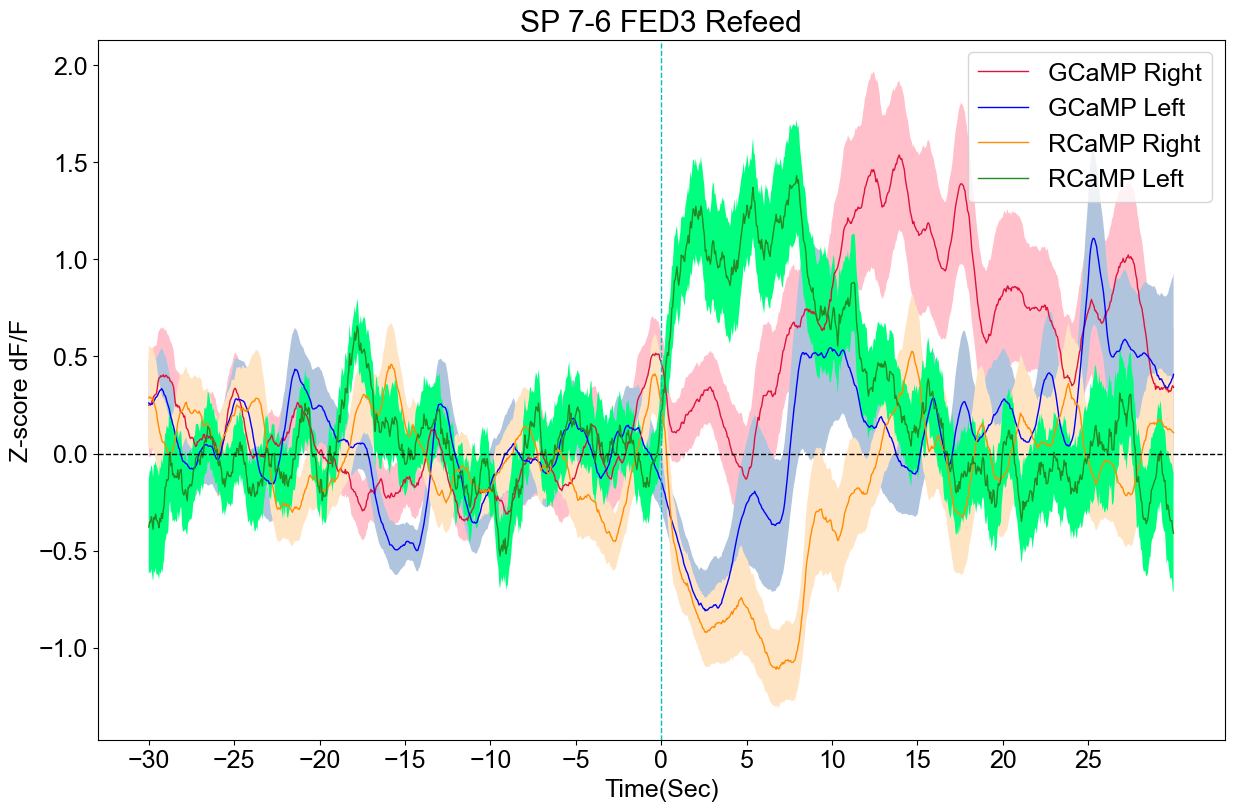

In [377]:
fig = plt.figure(figsize=(32, 20))
ax1 = fig.add_subplot(221)
ax1.plot(x,allgcamprighttrials['Mean'],'crimson',linewidth=1)
ax1.plot(x,allgcamplefttrials['Mean'],'blue',linewidth=1)

ax1.plot(x,allrcamprighttrials['Mean'],'darkorange',linewidth=1)
ax1.plot(x,allrcamplefttrials['Mean'],'forestgreen',linewidth=1)

ax1.set_xlabel('Time(Sec)')
ax1.set_ylabel('Z-score dF/F')
ax1.fill_between(x,allgcamprighttrialslowererror,allgcamprighttrialsuppererror, facecolor='pink')
ax1.fill_between(x,allgcamplefttrialslowererror,allgcamplefttrialsuppererror, facecolor='lightsteelblue')

ax1.fill_between(x,allrcamprighttrialslowererror,allrcamprighttrialsuppererror, facecolor='bisque')
ax1.fill_between(x,allrcamplefttrialslowererror,allrcamplefttrialsuppererror, facecolor='springgreen')


plt.axhline(0,0,1,linewidth=1,color='black',linestyle='--')
plt.axvline(0,0,1,linewidth=1,color='c',linestyle='--') #Reference keydown to find spot to place line
plt.legend(['GCaMP Right','GCaMP Left','RCaMP Right','RCaMP Left'])
plt.title("SP 7-6 FED3 Refeed")
plt.xticks(np.arange(-30, 30, step=5))
#plt.savefig('SP 7-7_38pellet_Refeed.png')